In [ ]:
print ("Project Started")

Project Started


<h1><center> Feature Engineering - Delhivery </center></h1>

## 🚚 Delivery Data Analysis
**✍️ Note from the Analyst:** This case study focuses on the logistics sector, specifically examining a leading Indian company in this domain. The study aims to enhance operational efficiency and service quality through in-depth data analysis.

### 🎯 Objective:
The primary goal is to analyze Delhivery\'s vast logistics data to improve forecasting models, streamline data processing, and ultimately enhance decision-making processes. This involves cleaning, manipulating, and understanding large sets of logistics data.

### 📊 Project Overview:
The project is structured into several critical phases:

- **🔍 Data Preparation and Cleaning:** Involves sanitizing and manipulating raw data from Delhivery's databases to extract meaningful features and prepare it for analysis.

- **🔢 Exploratory Data Analysis (EDA):** A comprehensive examination of the dataset to understand the structure, detect patterns, and identify anomalies in the logistics data.

- **📐 Feature Engineering:** Developing new data features from existing columns like 'Destination Name' and 'Trip_creation_time', and handling categorical values like 'route_type'.

- **🔎 Advanced Feature Engineering:** Aggregating data based on 'trip_uuid', 'Source ID', and 'Destination ID' to understand package delivery dynamics.

- **🧮 Outlier Detection and Treatment:** Identifying and addressing outliers in the data set, particularly in numerical variables, using techniques like the IQR method.

- **📉 In-depth Analysis:** Conducting hypothesis testing and visual analysis to compare various metrics like actual vs. forecasted times and distances.

- **🔄 Data Normalization and Standardization:** Applying MinMaxScaler or StandardScaler to normalize numerical features for consistent data analysis.

- **📈 Business Insight Extraction:** Analyzing aggregated data to derive actionable business insights like identifying the most active corridors, average distances and times, etc.

- **💡 Recommendations:** Providing strategic suggestions for business improvements based on data insights, focusing on practical and easily understandable action items.

# Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# stats related libraries
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [ ]:
# Categorical Features Encoding Libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Scaling Technique

# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

* **Seaborn Plot(Graph) Settings:**

In [ ]:
# Set the common format for Ploting any Graph for analysis

sns.set_palette(palette="Set2",n_colors=18)
sns.set_style("whitegrid", {'axes.facecolor': '0.97'})

# Reading Input File:

In [ ]:
delhivery_df = pd.read_csv("delhivery_data.csv")

delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
delhivery_df.shape

(144867, 24)

row - 144867

col - 24

In [ ]:
delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

- Incorrect Datatype Assigned to few columns :

    - trip_creation_time
    - od_start_time
    - od_end_time
    - cutoff_timestamp
      
    - start_scan_to_end_scan
    - actual_time
    - osrm_time
    - segment_actual_time
    - segment_osrm_time

- Also we can round off the below columns values upto 3 decimal to increase readability :

    - actual_distance_to_destination
    - osrm_distance
    - factor
    - segment_osrm_distance
    - segment_factor
      
  
  

In [ ]:
delhivery_df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

- As there is only 2 unique values present in Columns (__data__ , __route_type__ and __is_cutoff__), we can change their datatype to "category" datatype.
- trip_uuid is primary_key of Dataset. Total 14817 trips data are given in the Dataset.

In [ ]:
delhivery_df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

- Missing Values are present in columns:
    - source_name = 293 records
    - destination_name = 261 records
  

# Data Preprocessing:

## Handling Datatype related Issue:

In [ ]:
# changing Datatype to Datetime datatype

delhivery_df["trip_creation_time"] = pd.to_datetime(delhivery_df["trip_creation_time"].str[:19],format='%Y-%m-%d %H:%M:%S')
delhivery_df["od_start_time"] = pd.to_datetime(delhivery_df["od_start_time"].str[:19],format='%Y-%m-%d %H:%M:%S')
delhivery_df["od_end_time"] = pd.to_datetime(delhivery_df["od_end_time"].str[:19],format='%Y-%m-%d %H:%M:%S')

In [ ]:
delhivery_df["cutoff_timestamp"] = pd.to_datetime(delhivery_df["cutoff_timestamp"].str[:19], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# changing Datatype to Integer datatype

In [ ]:
 # - start_scan_to_end_scan
 #    - actual_time
 #    - osrm_time
 #    - segment_actual_time
 #    - segment_osrm_time

delhivery_df["start_scan_to_end_scan"] = delhivery_df["start_scan_to_end_scan"].astype("int")
delhivery_df["actual_time"] = delhivery_df["actual_time"].astype("int")
delhivery_df["osrm_time"] = delhivery_df["osrm_time"].astype("int")
delhivery_df["segment_actual_time"] = delhivery_df["segment_actual_time"].astype("int")

In [ ]:
# round off the below columns values upto 3 decimal to increase readability :

In [ ]:
    # - actual_distance_to_destination
    # - osrm_distance
    # - factor
    # - segment_osrm_distance
    # - segment_factor

delhivery_df["actual_distance_to_destination"] = delhivery_df["actual_distance_to_destination"].round(3)
delhivery_df["osrm_distance"] = delhivery_df["osrm_distance"].round(3)
delhivery_df["factor"] = delhivery_df["factor"].round(3)
delhivery_df["segment_osrm_distance"] = delhivery_df["segment_osrm_distance"].round(3)
delhivery_df["segment_factor"] = delhivery_df["segment_factor"].round(3)


In [ ]:
# changing datatype to "category" datatype

# data and route_type

delhivery_df["data"] = delhivery_df["data"].astype("category")
delhivery_df["route_type"] = delhivery_df["route_type"].astype("category")

In [ ]:
delhivery_df["is_cutoff"] = delhivery_df["is_cutoff"].astype("category")

In [ ]:
# validating the changes

delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
delhivery_df.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
48657,training,2018-09-24 01:21:58,thanos::sroute:cddde595-4764-4102-b5e2-2687cde...,FTL,trip-153775211835690683,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-09-24 01:21:58,...,2018-09-24 23:41:27,595.336,903,498,683.025,1.813,25,18.0,26.245,1.389
66258,training,2018-09-20 00:35:31,thanos::sroute:233c5ce2-a1e2-4550-945c-28c357c...,Carting,trip-153740249058638050,IND390022AAA,Vadodara_Karelibaug_DPC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 00:35:31,...,2018-09-20 00:45:55,33.797,53,26,36.141,2.038,8,5.0,5.035,1.600
86920,training,2018-09-17 00:50:49,thanos::sroute:bbda1b14-ddec-4bac-9585-e692bca...,FTL,trip-153714544976670953,IND140118AAA,AnandprShb_PnjPiara_D (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-17 05:26:33,...,2018-09-17 07:04:10,44.252,66,52,69.938,1.269,36,25.0,22.891,1.440
112579,training,2018-09-21 20:51:32,thanos::sroute:54e99fa1-a23e-4af7-b875-f574319...,Carting,trip-153756309268666660,IND500008AAC,Hyderabad_Tolichwk_I (Telangana),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-21 20:51:32,...,2018-09-21 21:05:18,17.587,52,23,26.491,2.261,36,13.0,13.004,2.769
113807,training,2018-09-16 22:43:47,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153713782709469234,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-16 22:43:47,...,2018-09-17 16:30:38,1233.829,2003,1187,1632.198,1.687,28,15.0,24.384,1.867


## Handling Missing Values:

In [ ]:
delhivery_df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
# further Deep checking for finding valid substitute for missing values of both columns

In [ ]:
delhivery_df[delhivery_df["source_name"].isnull()].describe(include="all")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,293,293,293,293,293,293,0,293,290,293,...,293,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
unique,2,NaN,18,2,66,10,0,17,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,test,NaN,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND282002AAD,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,164,NaN,60,288,10,128,NaN,90,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2018-09-27 18:25:02.337884160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-28 05:43:25.870307328,...,2018-09-28 07:59:05.423208192,76.993840,152.068259,75.054608,93.458396,2.036000,39.631399,23.624573,27.756703,2.075451
min,NaN,2018-09-19 20:57:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-20 02:09:24,...,2018-09-20 02:15:24,11.971000,21.000000,10.000000,14.041000,0.434000,0.000000,0.000000,0.000000,-1.000000
25%,NaN,2018-09-25 05:55:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-25 13:55:07,...,2018-09-25 15:38:24,34.664000,66.000000,39.000000,46.843000,1.439000,28.000000,17.000000,23.020000,1.364000
50%,NaN,2018-09-27 22:27:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-28 00:26:28,...,2018-09-28 01:53:37,66.003000,122.000000,61.000000,76.092000,2.023000,36.000000,20.000000,25.029000,1.778000
75%,NaN,2018-09-30 18:48:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-01 07:31:52,...,2018-10-01 09:02:31,108.442000,192.000000,98.000000,121.360000,2.460000,48.000000,26.000000,30.472000,2.375000
max,NaN,2018-10-03 21:27:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-04 04:33:18,...,2018-10-04 07:10:14,236.815000,495.000000,234.000000,294.581000,6.826000,259.000000,160.000000,218.108000,40.000000


In [ ]:
# source_name missing values --> list of corresponding source_center

source_missing_list_source_center = delhivery_df[delhivery_df["source_name"].isnull()] ["source_center"].unique()
source_missing_list_source_center

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
# destination_name missing values --> list of corresponding destination_center

destination_missing_list_destination_center = delhivery_df[delhivery_df["destination_name"].isnull()] ["destination_center"].unique()
destination_missing_list_destination_center

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
# checking the values present in Original Dataset's Source center column --> for  Source_center_missing values_list

delhivery_df[delhivery_df["source_center"].isin(source_missing_list_source_center)]["source_name"].unique()

array([nan], dtype=object)

In [ ]:
# checking the values present in Original Dataset's Source center column --> for  destination_center_missing values_list

delhivery_df[delhivery_df["source_center"].isin(destination_missing_list_destination_center)]["source_name"].unique()

array([nan], dtype=object)

In [ ]:
# checking the values present in Original Dataset's Destination center column --> for  destination_center_missing values_list

delhivery_df[delhivery_df["destination_center"].isin(destination_missing_list_destination_center)]["destination_name"].unique()

array([nan], dtype=object)

In [ ]:
# checking the values present in Original Dataset's Destination center column --> for  Source_center_missing values_list

delhivery_df[delhivery_df["destination_center"].isin(source_missing_list_source_center)]["destination_name"].unique()

array([nan], dtype=object)

- NOTE: NO substitue values found in given dataset.

    - So, we will fill "Unknown_Source_Name" and "Unknown_Destination_Name" values for missing values.

In [ ]:
# Filling Missing values:

delhivery_df["source_name"].fillna("Unknown_Source_Name", inplace= True)
delhivery_df["destination_name"].fillna("Unknown_Destination_Name", inplace=True)

In [ ]:
delhivery_df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

__--> Now, There is no Missing Values in Dataset.__

## Dropping Undefined column:

In [ ]:
# Below features are not defined in given dataset. Since, Dropping them.
undefined_column = ["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"]

In [ ]:
delhivery_df.drop(columns = undefined_column, inplace= True)

In [ ]:
delhivery_df.shape

(144867, 19)

Now, __Columns__ = 19

## Merging rows based on Trip_uuid,Source_center,destination_center:

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
temp = delhivery_df.copy()

temp

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86,10.436,14,11,11.965,14,11.0,11.965
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86,18.937,24,20,21.724,10,9.0,9.759
2,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86,27.637,40,28,32.539,16,7.0,10.815
3,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86,36.118,62,40,45.562,21,12.0,13.022
4,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86,39.386,68,44,54.218,6,5.0,3.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28,2018-09-20 23:32:09,427,45.258,94,60,67.928,12,12.0,8.186
144863,training,2018-09-20 16:24:28,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28,2018-09-20 23:32:09,427,54.093,120,76,85.683,26,21.0,17.372
144864,training,2018-09-20 16:24:28,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28,2018-09-20 23:32:09,427,66.164,140,88,97.093,20,34.0,20.705
144865,training,2018-09-20 16:24:28,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28,2018-09-20 23:32:09,427,73.681,158,98,111.271,17,27.0,18.888


In [ ]:
temp["segment_key"] = temp["trip_uuid"] + " - " + temp["source_center"] + " - " + temp["destination_center"]

temp["segment_key"]

0         trip-153741093647649320 - IND388121AAA - IND38...
1         trip-153741093647649320 - IND388121AAA - IND38...
2         trip-153741093647649320 - IND388121AAA - IND38...
3         trip-153741093647649320 - IND388121AAA - IND38...
4         trip-153741093647649320 - IND388121AAA - IND38...
                                ...                        
144862    trip-153746066843555182 - IND131028AAB - IND00...
144863    trip-153746066843555182 - IND131028AAB - IND00...
144864    trip-153746066843555182 - IND131028AAB - IND00...
144865    trip-153746066843555182 - IND131028AAB - IND00...
144866    trip-153746066843555182 - IND131028AAB - IND00...
Name: segment_key, Length: 144867, dtype: object

In [ ]:
temp.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86,10.436,14,11,11.965,14,11.0,11.965,trip-153741093647649320 - IND388121AAA - IND38...
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86,18.937,24,20,21.724,10,9.0,9.759,trip-153741093647649320 - IND388121AAA - IND38...


In [ ]:
# performing cumulative sum on columns --> segment_actual_time,segment_osrm_time,segment_osrm_distance

temp["segment_actual_time_sum"] = temp.groupby("segment_key")["segment_actual_time"].apply("cumsum")
temp["segment_osrm_time_sum"] = temp.groupby("segment_key")["segment_osrm_time"].apply("cumsum")
temp["segment_osrm_distance_sum"] = temp.groupby("segment_key")["segment_osrm_distance"].apply("cumsum")

- __Dropping the redundant columns before Merging the rows:__
    - segment_actual_time
    - segment_osrm_time
    - segment_osrm_distance

In [ ]:
temp.drop(columns = ["segment_actual_time","segment_osrm_time","segment_osrm_distance"], inplace=True)

In [ ]:
temp.shape

(144867, 20)

In [ ]:
temp.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86,10.436,14,11,11.965,trip-153741093647649320 - IND388121AAA - IND38...,14,11.0,11.965
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86,18.937,24,20,21.724,trip-153741093647649320 - IND388121AAA - IND38...,24,20.0,21.724


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

- __Merging at Segment level:__

In [ ]:
merging_segment_dict = {
    "data":"first",
    "trip_creation_time":"first",
    "route_schedule_uuid":"first",
    "route_type":"first",
    "trip_uuid":"first",
    "source_center":"first",
    "source_name":"first",
    "destination_center":"first",
    "destination_name":"first",
    "od_start_time":"first",
    "od_end_time":"first",
    "start_scan_to_end_scan":"first",

    "actual_distance_to_destination":"max",
    "actual_time":"max",
    "osrm_time":"max",
    "osrm_distance":"max",
    "segment_actual_time_sum":"max",
    "segment_osrm_time_sum":"max",
    "segment_osrm_distance_sum":"max"


}

In [ ]:
segment_level_delhivery_df = temp.groupby("segment_key",as_index=False).agg(merging_segment_dict).sort_values(by=["trip_uuid","od_end_time"])

segment_level_delhivery_df

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
1,trip-153671041653548748 - IND462022AAA - IND20...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16,2018-09-12 16:39:46,999,440.974,830,394,544.803,820,474.0,649.852
0,trip-153671041653548748 - IND209304AAA - IND00...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46,2018-09-13 13:40:23,1260,383.759,732,349,446.550,728,534.0,670.620
3,trip-153671042288605164 - IND572101AAA - IND56...,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22,2018-09-12 02:03:09,122,48.543,96,42,56.912,95,39.0,55.989
2,trip-153671042288605164 - IND561203AAB - IND56...,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09,2018-09-12 03:01:59,58,24.644,47,26,28.199,46,26.0,28.199
5,trip-153671043369099517 - IND562132AAA - IND00...,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33,2018-09-14 03:40:17,3099,1689.965,2736,1529,2090.874,2700,1710.0,2227.526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069 - IND628204AAA - IND62...,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04,2018-10-04 03:31:11,62,33.627,51,41,42.521,49,42.0,42.144
26362,trip-153861115439069069 - IND627657AAA - IND62...,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-04 03:31:11,2018-10-04 04:16:39,45,17.373,33,31,25.709,32,30.0,25.708
26364,trip-153861115439069069 - IND628613AAA - IND62...,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39,2018-10-04 05:47:45,91,33.674,90,48,40.608,89,77.0,78.587
26367,trip-153861118270144424 - IND583201AAA - IND58...,test,2018-10-03 23:59:42,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44,2018-10-04 03:58:40,66,25.535,42,26,28.048,41,25.0,28.049


In [ ]:
segment_level_delhivery_df.shape

(26368, 20)

__segment_level_delhivery_df:__
- __Rows = 26368__
- __cols = 20__

## Feature Engineering:

Extract features from the below fields:
1. Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.
2. Source Name: Split and extract features out of Source. City-place-code
(State)
3. Destination Name: Split and extract features out of destination. City-place-code
(State)
4. Trip_creation_time: Extract features like month, year, day, etc.

- __1. Calculate time taken between od_start_time and od_end_time and keep it as a feature named od_time_diff_hour. Drop the original columns, if required.__

In [ ]:
# calculate feature named od_time_diff_hour

segment_level_delhivery_df["od_time_diff_hour"] = round((segment_level_delhivery_df["od_end_time"] - segment_level_delhivery_df["od_start_time"]).dt.total_seconds()/60,0)

segment_level_delhivery_df["od_time_diff_hour"] = segment_level_delhivery_df["od_time_diff_hour"].astype("int")

In [ ]:
segment_level_delhivery_df.head(2)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
1,trip-153671041653548748 - IND462022AAA - IND20...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16,2018-09-12 16:39:46,999,440.974,830,394,544.803,820,474.0,649.852,1000
0,trip-153671041653548748 - IND209304AAA - IND00...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46,2018-09-13 13:40:23,1260,383.759,732,349,446.550,728,534.0,670.620,1261


In [ ]:
# Drop the columns - "od_end_time","od_start_time"

segment_level_delhivery_df.drop( columns = ["od_end_time","od_start_time"], inplace=True)

In [ ]:
segment_level_delhivery_df

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
1,trip-153671041653548748 - IND462022AAA - IND20...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999,440.974,830,394,544.803,820,474.0,649.852,1000
0,trip-153671041653548748 - IND209304AAA - IND00...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260,383.759,732,349,446.550,728,534.0,670.620,1261
3,trip-153671042288605164 - IND572101AAA - IND56...,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122,48.543,96,42,56.912,95,39.0,55.989,123
2,trip-153671042288605164 - IND561203AAB - IND56...,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58,24.644,47,26,28.199,46,26.0,28.199,59
5,trip-153671043369099517 - IND562132AAA - IND00...,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3099,1689.965,2736,1529,2090.874,2700,1710.0,2227.526,3100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069 - IND628204AAA - IND62...,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),62,33.627,51,41,42.521,49,42.0,42.144,62
26362,trip-153861115439069069 - IND627657AAA - IND62...,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),45,17.373,33,31,25.709,32,30.0,25.708,45
26364,trip-153861115439069069 - IND628613AAA - IND62...,test,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),91,33.674,90,48,40.608,89,77.0,78.587,91
26367,trip-153861118270144424 - IND583201AAA - IND58...,test,2018-10-03 23:59:42,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),66,25.535,42,26,28.048,41,25.0,28.049,67


- __2. Source Name: Split and extract features out of Source. City-place-code (State)__
- __3. Destination Name: Split and extract features out of destination. City-place-code
(State)__

In [ ]:
# Function: to get city from source_name / destination_name

def get_city(txt):

    end_index =  txt.find("_")
    if end_index != -1:
        city = txt[:end_index]
    elif (end_index == -1) & (txt.find(" ") != -1):
        end_index = txt.find(" ")
        city = txt[:end_index]
    else:
        city="Unknown_city"

    return verify_city(city)

In [ ]:
def verify_city(x):
    if 'CCU' in x:
        return 'Kolkata'
    elif 'MAA' in x.upper():
        return 'Chennai'
    elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
        return 'Bengaluru'
    elif 'FBD' in x.upper():
        return 'Faridabad'
    elif 'BOM' in x.upper():
        return 'Mumbai'
    elif 'DEL' in x.upper():
        return 'Delhi'
    elif 'OK' in x.upper():
        return 'Delhi'
    elif 'NOI' in x.upper():
        return 'Delhi'
    elif 'KN' in x.upper():
        return 'Delhi'
    elif 'GZB' in x.upper():
        return 'Ghaziabad'
    elif 'GGN' in x.upper():
        return 'Gurgaon'
    elif 'AMD' in x.upper():
        return 'Ahmedabad'
    elif 'CJB' in x.upper():
        return 'Coimbatore'
    elif 'HYD' in x.upper():
        return 'Hyderabad'
    elif 'PNQ' in x.upper():
        return "Pune"
    else:
        return x

In [ ]:
# Function: to get state from source_name / destination_name

def get_state(txt):

    start_index = txt.find("(")+1
    end_index =  txt.find(")")

    if end_index != -1 or start_index != -1:
        state = txt[start_index:end_index]
    else:
        state="Unknown_state"

    return state

In [ ]:
# source_city

segment_level_delhivery_df["source_city"] = segment_level_delhivery_df["source_name"].str.strip().apply(get_city)

segment_level_delhivery_df["source_city"].head(4)

1        Bhopal
0        Kanpur
3        Tumkur
2    Doddablpur
Name: source_city, dtype: object

In [ ]:
# source_state

segment_level_delhivery_df["source_state"] = segment_level_delhivery_df["source_name"].str.strip().apply(get_state)

segment_level_delhivery_df["source_state"].head(4)

1    Madhya Pradesh
0     Uttar Pradesh
3         Karnataka
2         Karnataka
Name: source_state, dtype: object

In [ ]:
# destination_city

segment_level_delhivery_df["destination_city"] = segment_level_delhivery_df["destination_name"].str.strip().apply(get_city)

segment_level_delhivery_df["destination_city"]

1               Kanpur
0              Gurgaon
3           Doddablpur
2           Chikblapur
5              Gurgaon
             ...      
26363    Thisayanvilai
26362         Peikulam
26364      Tirunelveli
26367           Sandur
26366          Bellary
Name: destination_city, Length: 26368, dtype: object

In [ ]:
# destination_state

segment_level_delhivery_df["destination_state"] = segment_level_delhivery_df["destination_name"].str.strip().apply(get_state)

segment_level_delhivery_df["destination_state"].head(2)

1    Uttar Pradesh
0          Haryana
Name: destination_state, dtype: object

In [ ]:
# checking the df

segment_level_delhivery_df.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_city,source_state,destination_city,destination_state
1,trip-153671041653548748 - IND462022AAA - IND20...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999,440.974,830,394,544.803,820,474.0,649.852,1000,Bhopal,Madhya Pradesh,Kanpur,Uttar Pradesh
0,trip-153671041653548748 - IND209304AAA - IND00...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260,383.759,732,349,446.550,728,534.0,670.620,1261,Kanpur,Uttar Pradesh,Gurgaon,Haryana
3,trip-153671042288605164 - IND572101AAA - IND56...,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122,48.543,96,42,56.912,95,39.0,55.989,123,Tumkur,Karnataka,Doddablpur,Karnataka
2,trip-153671042288605164 - IND561203AAB - IND56...,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58,24.644,47,26,28.199,46,26.0,28.199,59,Doddablpur,Karnataka,Chikblapur,Karnataka
5,trip-153671043369099517 - IND562132AAA - IND00...,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3099,1689.965,2736,1529,2090.874,2700,1710.0,2227.526,3100,Bangalore,Karnataka,Gurgaon,Haryana


- __4. Trip_creation_time: Extract features like month, year, day, etc.__

In [ ]:
# Trip_creation_month,

segment_level_delhivery_df["trip_creation_month"] = segment_level_delhivery_df["trip_creation_time"].dt.month_name().str[:3]

segment_level_delhivery_df["trip_creation_month"].head(5)

1    Sep
0    Sep
3    Sep
2    Sep
5    Sep
Name: trip_creation_month, dtype: object

In [ ]:
# Trip_creation_year

segment_level_delhivery_df["trip_creation_year"] = segment_level_delhivery_df["trip_creation_time"].dt.year.astype("category")

segment_level_delhivery_df["trip_creation_year"].head(5)

1    2018
0    2018
3    2018
2    2018
5    2018
Name: trip_creation_year, dtype: category
Categories (1, int32): [2018]

In [ ]:
# Trip_creation_day

segment_level_delhivery_df["trip_creation_day"] = segment_level_delhivery_df["trip_creation_time"].dt.day.astype("str")

segment_level_delhivery_df["trip_creation_day"]

1        12
0        12
3        12
2        12
5        12
         ..
26363     3
26362     3
26364     3
26367     3
26366     3
Name: trip_creation_day, Length: 26368, dtype: object

In [ ]:
segment_level_delhivery_df.head(4)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
1,trip-153671041653548748 - IND462022AAA - IND20...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999,440.974,830,394,544.803,820,474.0,649.852,1000,Bhopal,Madhya Pradesh,Kanpur,Uttar Pradesh,Sep,2018,12
0,trip-153671041653548748 - IND209304AAA - IND00...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260,383.759,732,349,446.550,728,534.0,670.620,1261,Kanpur,Uttar Pradesh,Gurgaon,Haryana,Sep,2018,12
3,trip-153671042288605164 - IND572101AAA - IND56...,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),122,48.543,96,42,56.912,95,39.0,55.989,123,Tumkur,Karnataka,Doddablpur,Karnataka,Sep,2018,12
2,trip-153671042288605164 - IND561203AAB - IND56...,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),58,24.644,47,26,28.199,46,26.0,28.199,59,Doddablpur,Karnataka,Chikblapur,Karnataka,Sep,2018,12


In [ ]:
segment_level_delhivery_df[segment_level_delhivery_df["trip_uuid"] == "trip-153671041653548748"]

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
1,trip-153671041653548748 - IND462022AAA - IND20...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999,440.974,830,394,544.803,820,474.0,649.852,1000,Bhopal,Madhya Pradesh,Kanpur,Uttar Pradesh,Sep,2018,12
0,trip-153671041653548748 - IND209304AAA - IND00...,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1260,383.759,732,349,446.550,728,534.0,670.620,1261,Kanpur,Uttar Pradesh,Gurgaon,Haryana,Sep,2018,12


In [ ]:
segment_level_delhivery_df.columns

Index(['segment_key', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'od_time_diff_hour', 'source_city',
       'source_state', 'destination_city', 'destination_state',
       'trip_creation_month', 'trip_creation_year', 'trip_creation_day'],
      dtype='object')

# Grouping and Aggregating at Trip-level:

In [ ]:
trip_level_delhivery_df = segment_level_delhivery_df.groupby("trip_uuid", as_index=False).agg(
    {
        "data":"first",
        "trip_creation_time":"first",
        "route_schedule_uuid":"first",
        "route_type":"first",

        "source_center":"first",
        "source_name":"first",

        "destination_center":"last",
        "destination_name":"last",

        "start_scan_to_end_scan":"sum",
        "actual_distance_to_destination":"sum",

        "actual_time":"sum",
        "osrm_time":"sum",
        "osrm_distance":"sum",
        "segment_actual_time_sum":"sum",
        "segment_osrm_time_sum":"sum",
        "segment_osrm_distance_sum":"sum",
        "od_time_diff_hour":"sum",

        "source_city":"first",
        "source_state":"first",
        "destination_city":"last",
        "destination_state":"last",


        "trip_creation_month":"first",
        "trip_creation_year":"first",
        "trip_creation_day":"first"

    }
)

trip_level_delhivery_df.head(3)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259,824.733,1562,743,991.353,1548,1008.0,1320.472,2261,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180,73.187,143,68,85.111,141,65.0,84.188,182,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12
2,trip-153671043369099517,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933,1932.274,3347,1741,2372.085,3308,1941.0,2545.267,3935,Bangalore,Karnataka,Chandigarh,Punjab,Sep,2018,12


In [ ]:
trip_level_delhivery_df.shape

(14817, 25)

In [ ]:
trip_level_delhivery_df.dtypes

trip_uuid                                 object
data                                    category
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
start_scan_to_end_scan                     int32
actual_distance_to_destination           float64
actual_time                                int32
osrm_time                                  int32
osrm_distance                            float64
segment_actual_time_sum                    int32
segment_osrm_time_sum                    float64
segment_osrm_distance_sum                float64
od_time_diff_hour                          int32
source_city                               object
source_state                              object
destination_city    

In [ ]:
numeric_trip_delhivery_df = trip_level_delhivery_df.select_dtypes(include=[np.number,"datetime64[ns]"] )

numeric_trip_delhivery_df.head(4)

,trip_creation_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,2018-09-12 00:00:16,2259,824.733,1562,743,991.353,1548,1008.0,1320.472,2261
1,2018-09-12 00:00:22,180,73.187,143,68,85.111,141,65.0,84.188,182
2,2018-09-12 00:00:33,3933,1932.274,3347,1741,2372.085,3308,1941.0,2545.267,3935
3,2018-09-12 00:01:00,100,17.175,59,15,19.680,59,16.0,19.877,100


In [ ]:
numeric_trip_delhivery_df.shape

(14817, 10)

In [ ]:
numeric_cols = numeric_trip_delhivery_df.columns.tolist()

numeric_cols

['trip_creation_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum',
 'od_time_diff_hour']

In [ ]:
categorical_trip_delhivery_df = trip_level_delhivery_df.select_dtypes(include=["object","category"])

categorical_trip_delhivery_df.head(4)

,trip_uuid,data,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Bangalore,Karnataka,Chandigarh,Punjab,Sep,2018,12
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,Mumbai,Maharashtra,Sep,2018,12


In [ ]:
categorical_cols = categorical_trip_delhivery_df.columns.tolist()

categorical_cols

['trip_uuid',
 'data',
 'route_schedule_uuid',
 'route_type',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'source_city',
 'source_state',
 'destination_city',
 'destination_state',
 'trip_creation_month',
 'trip_creation_year',
 'trip_creation_day']

## Statistical Analysis:

- __Categorical Features (columns):__

In [ ]:
categorical_trip_delhivery_df.describe().T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
data,14817,2,training,10654
route_schedule_uuid,14817,1504,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,14817,2,Carting,8908
source_center,14817,868,IND000000ACB,948
source_name,14817,865,Gurgaon_Bilaspur_HB (Haryana),948
destination_center,14817,956,IND000000ACB,813
destination_name,14817,948,Gurgaon_Bilaspur_HB (Haryana),813
source_city,14817,641,Bengaluru,1134
source_state,14817,30,Maharashtra,2682


**Insight 1:**

This initial exploration provides a foundational understanding of the delivery trip data. This report summarizes key insights from the provided dataset on delivery trips.

**Overall Volume and Uniqueness:**

- A total of **14,817** delivery trips were recorded.
- All trip IDs (trip_uuid) are unique, indicating no duplicates in the data.

**Data Distribution:**

- The most frequent data point encountered is the **training** data type, appearing **10,654** times.
- The route schedule UUIDs (route_schedule_uuid) exhibit **the highest diversity** with **1,504** unique values.
- Source and destination centers (source_center, destination_center) show a significant concentration in **IND000000ACB** (possibly a central hub), while source and destination names (source_name, destination_name) reveal a focus on **Gurgaon_Bilaspur_HB (Haryana)**.

**Origin and Destination Breakdown:**

- **Source:**
    - Bengaluru is the most frequent source city (`source_city`), accounting for **1,134** trips.
    - Maharashtra is the leading source state (`source_state`) with **2,682** trips.
- **Destination:**
    - Bengaluru also emerges as the top destination city (`destination_city`) with **1,267** trips.
    - Maharashtra remains the dominant destination state (`destination_state`) with **2,591** trips.

**Temporal Analysis:**

- The majority of trips were created in **September 2018** (`trip_creation_month`, `trip_creation_year`).
- The specific day with the most trip creations was the **18th of September** (`trip_creation_day`).


- __Numerical Features (columns) :__

In [ ]:
numeric_trip_delhivery_df.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14817,2018-09-22 12:44:19.054869248,2018-09-12 00:00:16,2018-09-17 02:51:25,2018-09-22 04:02:35,2018-09-27 19:37:41,2018-10-03 23:59:42,NaN
start_scan_to_end_scan,14817.0,530.810016,23.0,149.0,280.0,637.0,7898.0,658.705957
actual_distance_to_destination,14817.0,164.683257,9.002,22.86,48.5,164.854,2187.484,305.561573
actual_time,14817.0,357.143754,9.0,67.0,149.0,370.0,6265.0,561.396157
osrm_time,14817.0,162.071202,6.0,29.0,60.0,169.0,2032.0,272.304633
osrm_distance,14817.0,205.101359,9.073,30.942,65.883,209.3,2840.082,370.780005
segment_actual_time_sum,14817.0,353.892421,9.0,66.0,147.0,367.0,6230.0,556.247998
segment_osrm_time_sum,14817.0,180.949787,6.0,31.0,65.0,185.0,2564.0,314.542047
segment_osrm_distance_sum,14817.0,223.201164,9.073,32.654,70.155,218.803,3523.629,416.628374
od_time_diff_hour,14817.0,531.697982,23.0,150.0,281.0,638.0,7899.0,658.871938


**Insight 2:** Delivery Trip Metrics (in Minutes and Kilometers)

This section analyzes numerical columns related to trip durations and distances. All time measurements are in minutes and distances are in kilometers.

* **Trip Creation Time:** The data spans from mid-September to early October 2018 (minimum: September 12th, maximum: October 3rd), indicating roughly three weeks of trip data.

* **Delivery Trip Durations:**
    * **start_scan_to_end_scan:** The average delivery trip duration (scanning at origin to destination) is approximately 9 hours (530.8 minutes), with a significant standard deviation (658.7 minutes). This suggests some trips take much longer than others. Further investigation into factors influencing these variations might be beneficial.
    * **actual_time, actual_distance_to_destination:** These columns likely represent the actual time taken for the delivery trip and the actual distance traveled. Their averages (357.1 and 164.7 kilometers) are lower than `start_scan_to_end_scan`, suggesting potential waiting or non-driving time within the total delivery process.
      

* **OSRM Estimates:**
    * **osrm_time, osrm_distance:** These columns likely represent estimated times and distances based on routing services (OSRM). Their averages (162.1 minutes and 205.1 kilometers) are generally lower than actual trip durations and distances, potentially indicating ideal scenarios without delays or traffic.

* **Segment Sums:**
    * **segment_actual_time_sum, segment_osrm_time_sum, segment_osrm_distance_sum:** These columns represent accumulated times and distances for individual trip segments. Their averages are similar to their non-segment counterparts, suggesting potential consistency within trip structures.

* **Time Difference (Origin to Destination):**
    * **od_time_diff_hour:** This column represents the time difference between origin and destination scans in hours. Its average (531.7 hours) aligns with the observations from `start_scan_to_end_scan`.

This analysis provides initial insights into the time and distance characteristics of delivery trips. Further investigation can delve deeper into specific aspects to improve efficiency and delivery timeliness.


## Outlier Detection and Treatment:

In [ ]:
trip_level_delhivery_df.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259,824.733,1562,743,991.353,1548,1008.0,1320.472,2261,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180,73.187,143,68,85.111,141,65.0,84.188,182,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12


In [ ]:
#  Removing trip_creation_time column for performing outlier_detection

numeric_cols_1 = numeric_cols.copy()

numeric_cols_1.remove('trip_creation_time')

numeric_cols_1

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum',
 'od_time_diff_hour']

In [ ]:
def get_outlier_percentages(df):

  outlier_percentages = {}
  for col in df.select_dtypes(include=[np.number]):
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)].shape[0]

    # Calculate outlier percentage
    outlier_percentage = (outliers / len(df)) * 100  # Percentage

    # Add to dictionary
    outlier_percentages[col] = outlier_percentage

  return outlier_percentages


In [ ]:
# Get outlier percentages
outlier_percentages = get_outlier_percentages( trip_level_delhivery_df.select_dtypes(include=[np.number]) )

# Print results
print("Outlier Percentages for Numeric Columns:")
print("="*40)
for col, percentage in outlier_percentages.items():
  print(f"{col}: {percentage:.2f}%")


Outlier Percentages for Numeric Columns:
start_scan_to_end_scan: 8.55%
actual_distance_to_destination: 9.78%
actual_time: 11.09%
osrm_time: 10.23%
osrm_distance: 10.30%
segment_actual_time_sum: 11.09%
segment_osrm_time_sum: 10.07%
segment_osrm_distance_sum: 10.45%
od_time_diff_hour: 8.54%


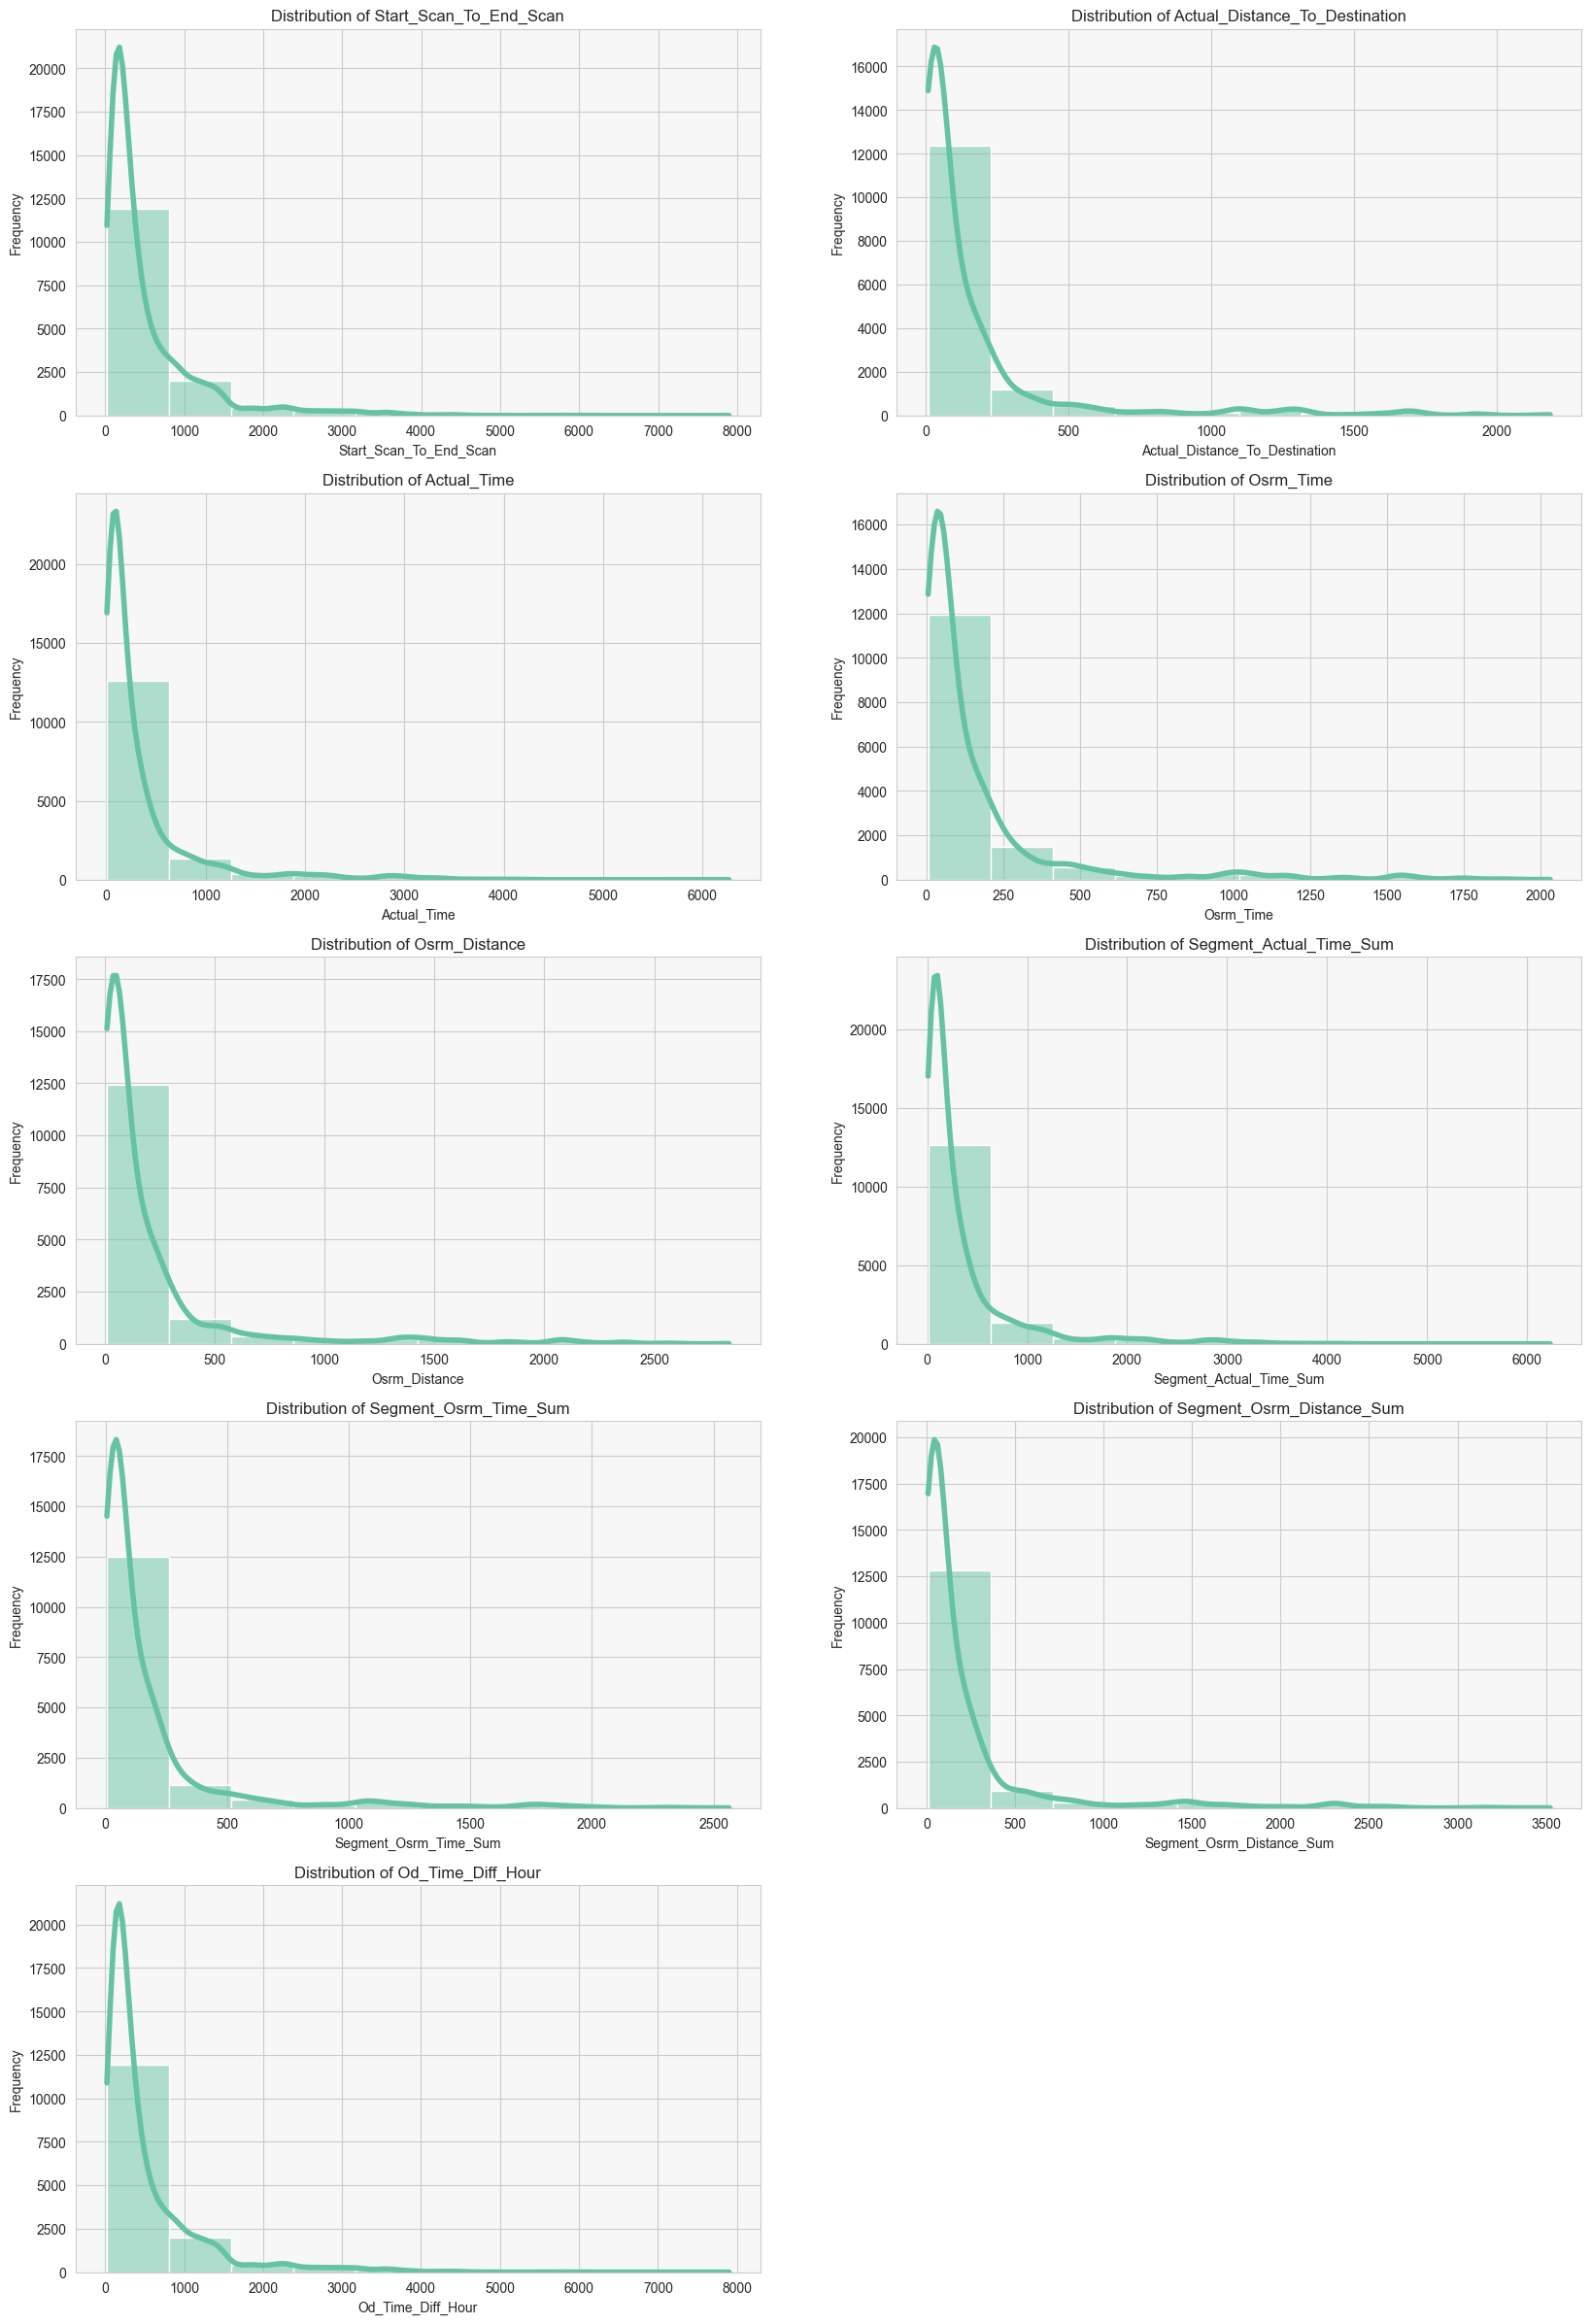

In [ ]:
# plotting the distribution

plt.figure(figsize=(20,30))

for i,col in enumerate(numeric_cols_1,1):

    plt.subplot(5,2,i)
    sns.histplot( trip_level_delhivery_df[col],bins=10, kde=True, line_kws={"linewidth": 4})
    plt.title(f"Distribution of {col.title()}")
    plt.xlabel(col.title())
    plt.ylabel("Frequency")

    plt.plot()

* **Outlier Treatment for Hypothesis Testing**

Our analysis identified outlier percentages ranging from 8.54% to 11.09% across the columns under investigation. Additionally, all these columns exhibit right-skewed distributions. Since we plan to conduct hypothesis testing on these columns in further analysis, it's crucial to address the outliers to ensure reliable results.

To achieve this, we will employ a two-step approach:

1. **Winsorization:** This technique will be used to cap extreme outliers within a specific range based on the interquartile range (IQR) for each column. This helps mitigate the undue influence of outliers on our hypothesis tests.

2. **Log Transformation:** After winsorization, we will apply log transformation to the data. This is particularly effective for right-skewed distributions, as it can compress the larger values and further reduce the impact of outliers while making the data more suitable for hypothesis testing assumptions.


In [ ]:
# winsorize_and_log_transform function

def winsorize_and_log_transform(df, percentiles=(5, 95)):

  df_transformed = df.copy()

  for col in df_transformed.select_dtypes(include=[np.number]):

    # Winsorization
    Q1 = df_transformed[col].quantile(percentiles[0] / 100)
    Q3 = df_transformed[col].quantile(percentiles[1] / 100)
    lower_bound = Q1 - 1.5 * (Q3 - Q1)  # Adjusted for potential outliers at tails
    upper_bound = Q3 + 1.5 * (Q3 - Q1)  # Adjusted for potential outliers at tails
    df_transformed.loc[df_transformed[col] < lower_bound, col] = lower_bound
    df_transformed.loc[df_transformed[col] > upper_bound, col] = upper_bound


    # Log transformation (after winsorization)
    df_transformed[col] = np.log(df_transformed[col])

  return df_transformed



# calling function
trip_delhivery_df_transformed = winsorize_and_log_transform(trip_level_delhivery_df)
trip_delhivery_df_transformed.head(3)


,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),7.722678,6.715060,7.353722,6.610696,6.899071,7.344719,6.915723,7.185745,7.723562,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),5.192957,4.293018,4.962845,4.219508,4.443956,4.948760,4.174387,4.433052,5.204007,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12
2,trip-153671043369099517,training,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),8.277158,7.566453,8.115820,7.462215,7.771525,8.104099,7.570959,7.841991,8.277666,Bangalore,Karnataka,Chandigarh,Punjab,Sep,2018,12


* **checking distribution again --> to asses the Impact on Outliers**

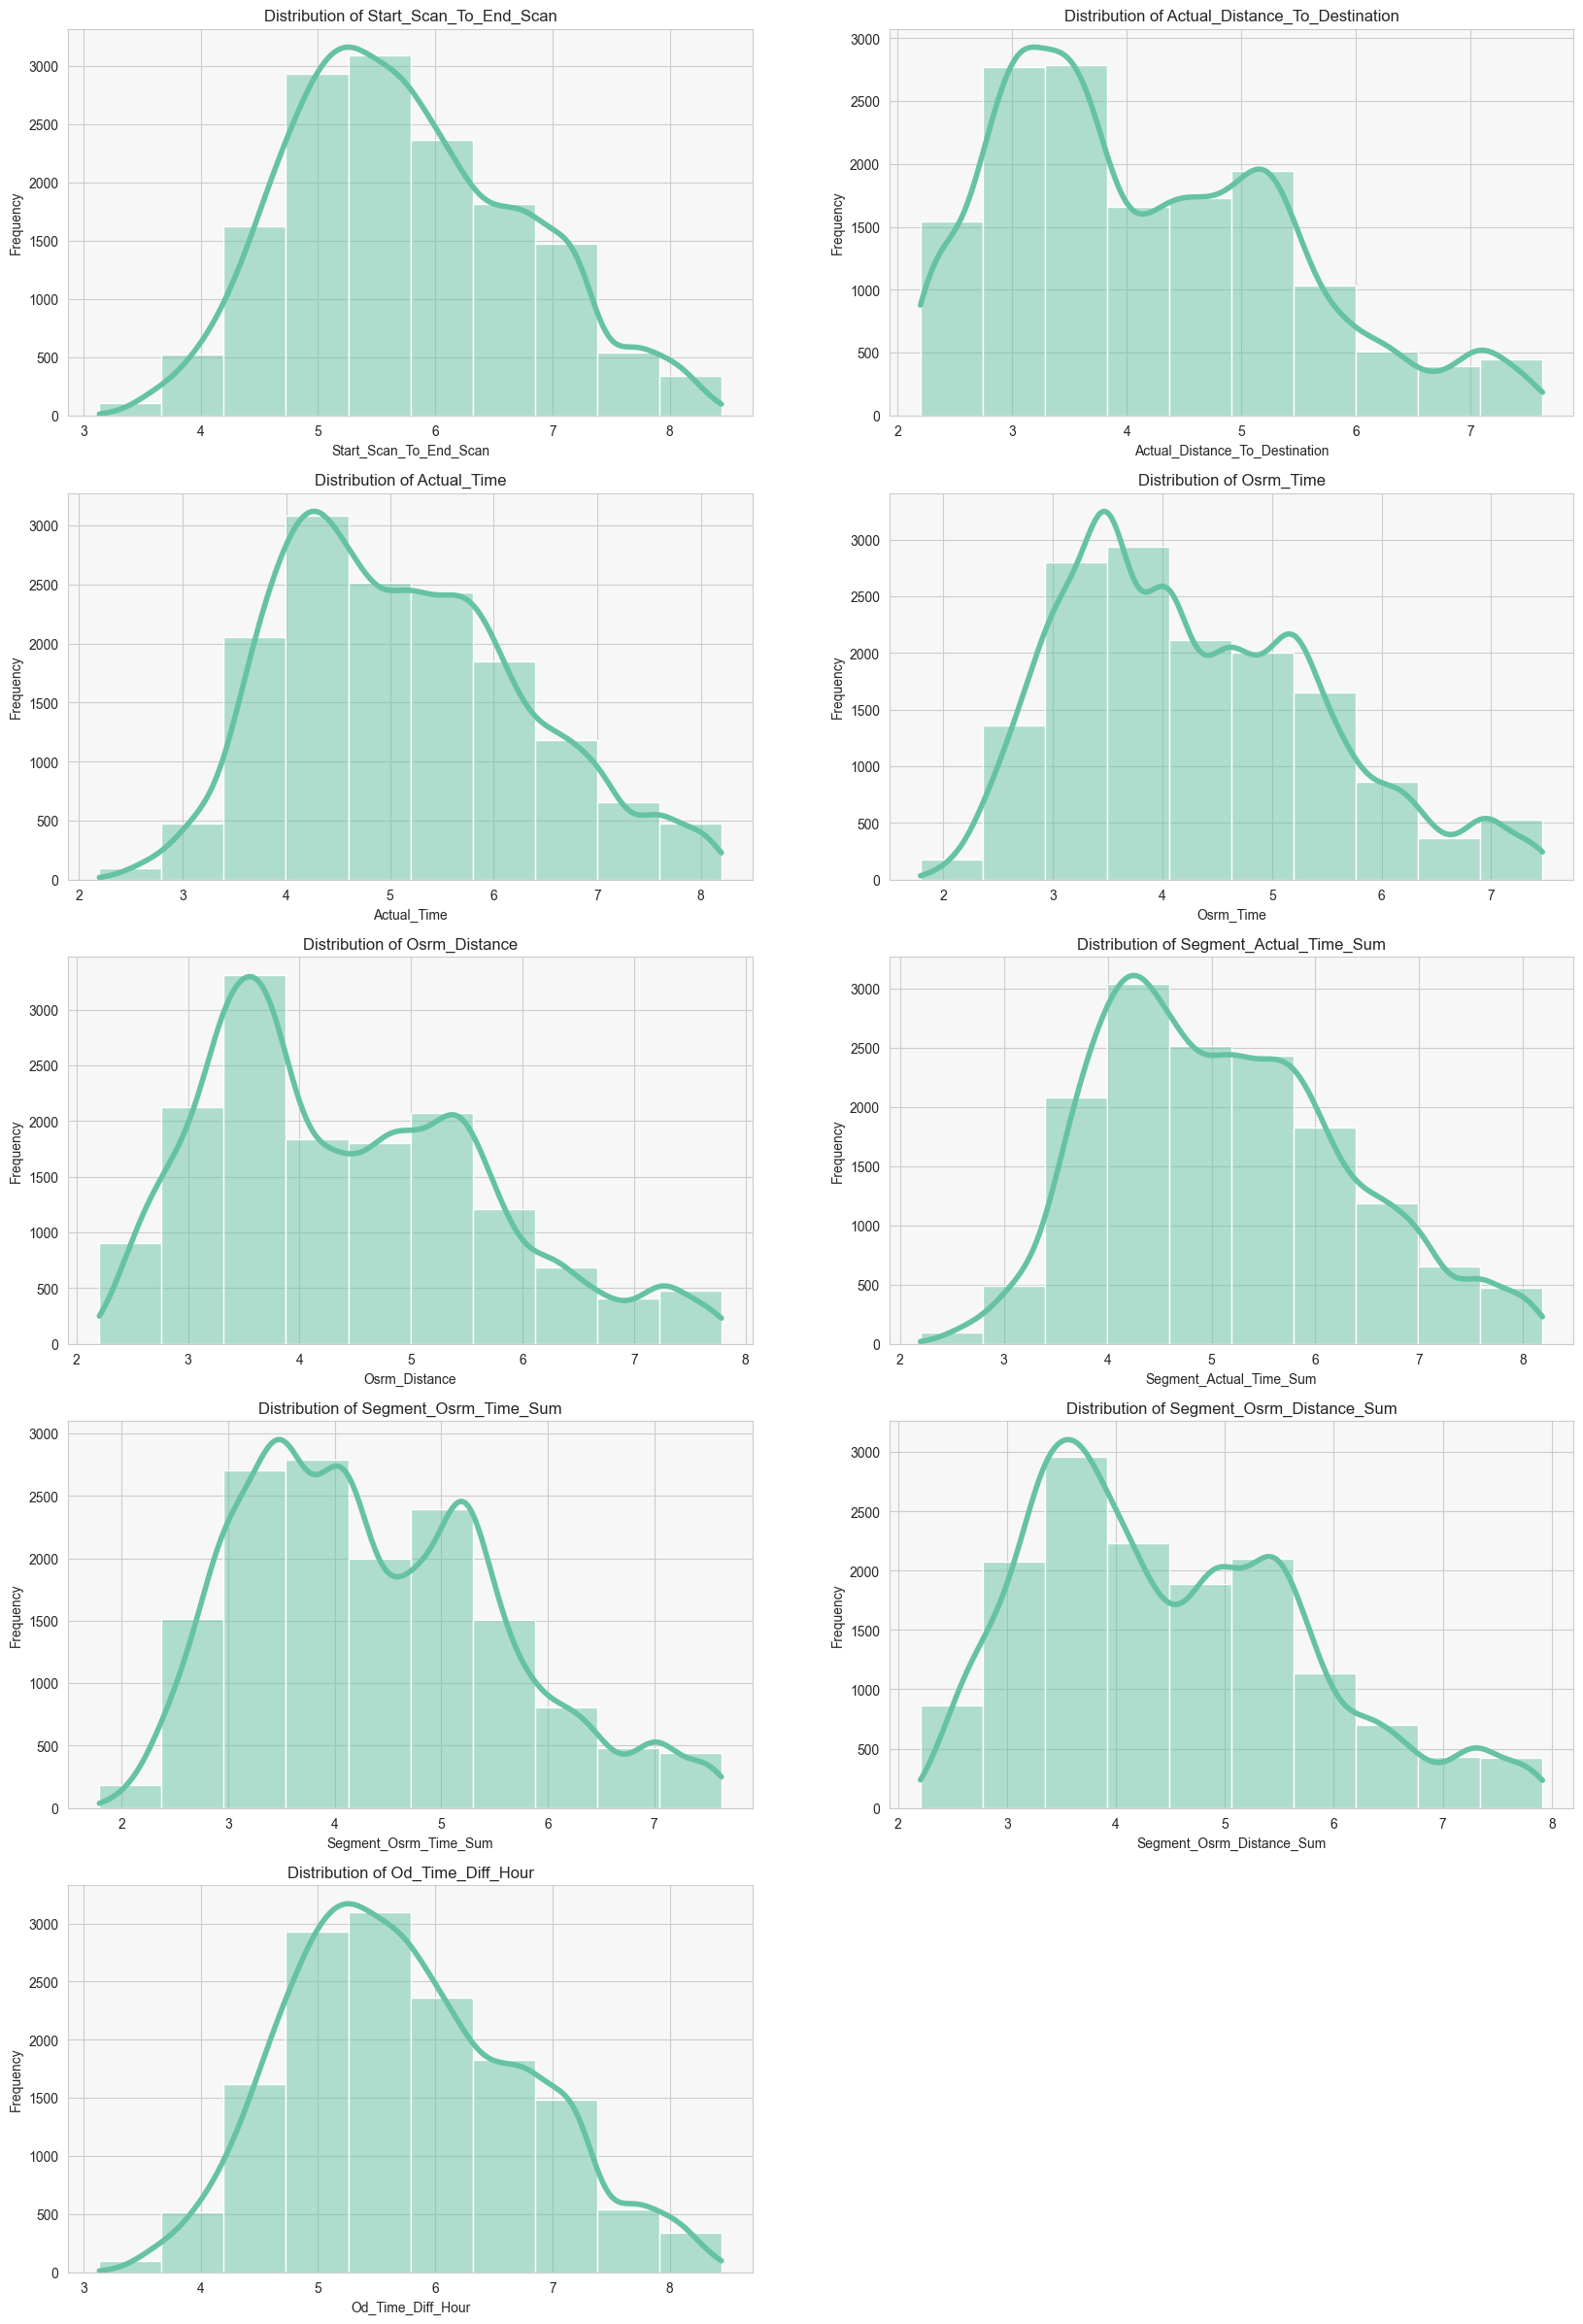

In [ ]:
# plotting the distribution

plt.figure(figsize=(20,30))

for i,col in enumerate(numeric_cols_1,1):

    plt.subplot(5,2,i)
    sns.histplot( trip_delhivery_df_transformed[col],bins=10, kde=True, line_kws={"linewidth": 4})
    plt.title(f"Distribution of {col.title()}")
    plt.xlabel(col.title())
    plt.ylabel("Frequency")

    plt.plot()

**--> While winsorization and log transformation were applied to address outliers and improve normality, some columns might still exhibit deviations from a normal distribution. This is not uncommon, and for these specific columns, we will employing hypothesis tests, considering the assumption of normality and variance in the data.**
   


# Hypothesis Testing:

<!-- 5. Hypothesis Testing:
   
1. Perform hypothesis testing / visual analysis between :

   
a. actual_time aggregated value and OSRM time aggregated value.

b. actual_time aggregated value and segment actual time aggregated
value.

c. OSRM distance aggregated value and segment OSRM distance
aggregated value.

d. OSRM time aggregated value and segment OSRM time aggregated
value.

3. Note: Aggregated values are the values you’ll get after merging the rows on the
basis of trip_uuid. -->

* Setup a Null and Alternate Hypothesis
* Choose an Appropriate Statistical Test and Select the left / right / two-tailed test as per the hypothesis
* Set the Significance Level (α)
* Compute the p - value ( perform the Statistical Test ) and Compare p - value to significance level

In [ ]:
# Renaming the columns

trip_delhivery_df_transformed.rename(columns={"actual_time":"actual_time_aggregated_value",
                                              "osrm_time":"osrm_time_aggregated_value",
                                              "osrm_distance": "osrm_distance_aggregated_value",
                                              "segment_actual_time_sum":"segment_actual_time_aggregated_value",
                                              "segment_osrm_time_sum":"segment_osrm_time_aggregated_value",
                                              "segment_osrm_distance_sum":"segment_osrm_distance_aggregated_value",
                                             }, inplace = True)

In [ ]:
trip_delhivery_df_transformed.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time_aggregated_value,osrm_time_aggregated_value,osrm_distance_aggregated_value,segment_actual_time_aggregated_value,segment_osrm_time_aggregated_value,segment_osrm_distance_aggregated_value,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),7.722678,6.715060,7.353722,6.610696,6.899071,7.344719,6.915723,7.185745,7.723562,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),5.192957,4.293018,4.962845,4.219508,4.443956,4.948760,4.174387,4.433052,5.204007,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12


### 1. actual_time aggregated value and OSRM time aggregated value.

In [ ]:
sample1 = trip_delhivery_df_transformed["actual_time_aggregated_value"]

sample2 = trip_delhivery_df_transformed["osrm_time_aggregated_value"]

**Step1: suitable hypothesis test to consider:**
  
* **Null Hypothesis (H0):** Mean of sample1 == sample2
      
* **Alternate Hypothesis(H1):** Mean of sample1 != sample2

In [ ]:
# size of samples

len(sample1), len(sample2)

(14817, 14817)

**Step2: Choose an Appropriate Statistical Test and Select the left / right / two-tailed test as per the hypothesis**

* Checking the Distribution(normal, non-normal) of Sample1 and Sample2

    1. Kdeplot:
    2. QQ Plot:
    3. shapiro Test:

* Checking the Variance of Sample1 and Sample2

    1. Boxplot
    2. Levene's test

* Conclusion based on these considerations:

    * If the variances are homogeneous and the sample size is large enough (ideally 30 or more per group), then a t-test (Student's t-test ) will be appropriate.
    * However, if the variances are unequal or the sample size is smaller, consider using non-parametric tests like the Mann-Whitney U test, which are less sensitive to these issues.


* As per hypothesis, we will go for Two-tailed Test.

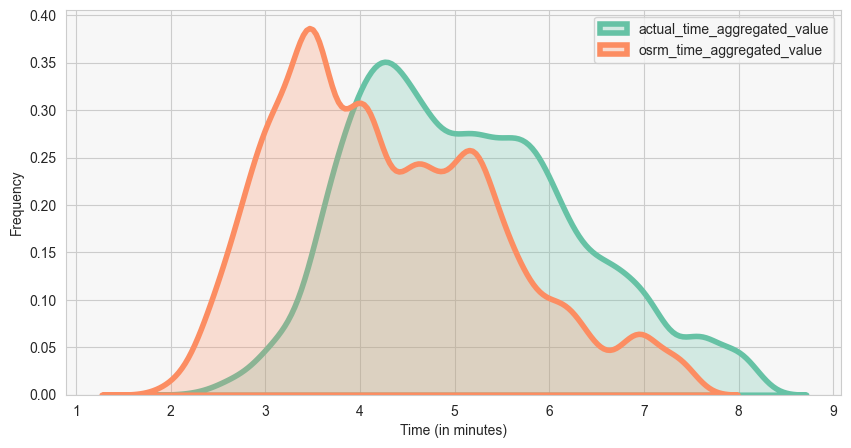

In [ ]:
# 1. visualization: kdeplot of sample1 AND sample2

plt.figure(figsize=(10,5))
sns.kdeplot(sample1,label="actual_time_aggregated_value",fill=True, linewidth=4)
sns.kdeplot(sample2,label="osrm_time_aggregated_value",fill=True, linewidth=4)
plt.legend()
plt.xlabel("Time (in minutes)")
plt.ylabel("Frequency")

plt.show()

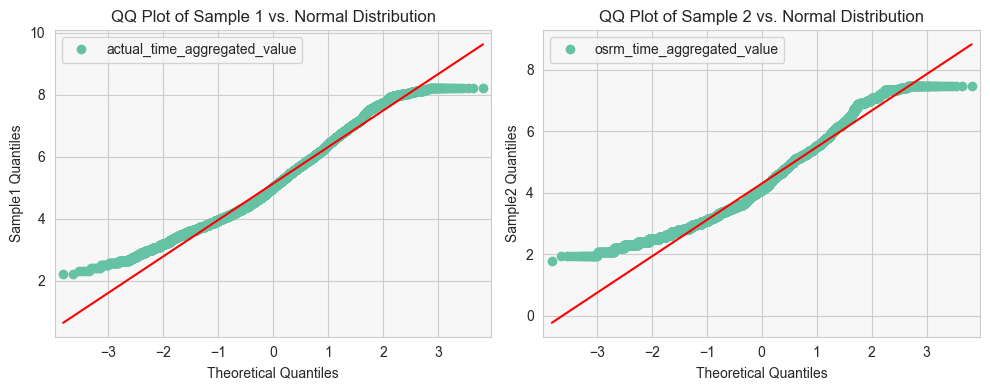

In [ ]:
# QQ Plot:
# import statsmodels.api as sm

plt.figure(figsize=(10, 4))  # Optional: Adjust figure size

plt.subplot(1, 2, 1)
qqplot(sample1, line='s',ax=plt.gca(),label="actual_time_aggregated_value")  # Red reference line
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample1 Quantiles')
plt.title('QQ Plot of Sample 1 vs. Normal Distribution')
plt.legend()

plt.subplot(1, 2, 2)
qqplot(sample2, line='s',ax=plt.gca(),label="osrm_time_aggregated_value")  # Red reference line
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample2 Quantiles')
plt.title('QQ Plot of Sample 2 vs. Normal Distribution')
plt.legend()

plt.tight_layout()  # Adjust spacing between plots (optional)
plt.show()

In [ ]:
# shapiro Test : Sample1

statistic, p_value = shapiro(sample1)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Sample1 doesnot follow the Normal Distribution.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that Sample1 doesnot follow the Normal Distribution")

p_value: 1.2283132117758636e-41
Reject H₀: Sample1 doesnot follow the Normal Distribution.


In [ ]:
# shapiro Test : Sample2

statistic, p_value = shapiro(sample2)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Sample2 doesnot follow the Normal Distribution.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that Sample2 doesnot follow the Normal Distribution")

p_value: 1.857427167701707e-49
Reject H₀: Sample2 doesnot follow the Normal Distribution.


**--> Above plots don't follow normal distribution. There is mild violation of Normal Distribution.**



* **Checking Variance of Sample1 and Sample2:***

In [ ]:
sample1.size

14817

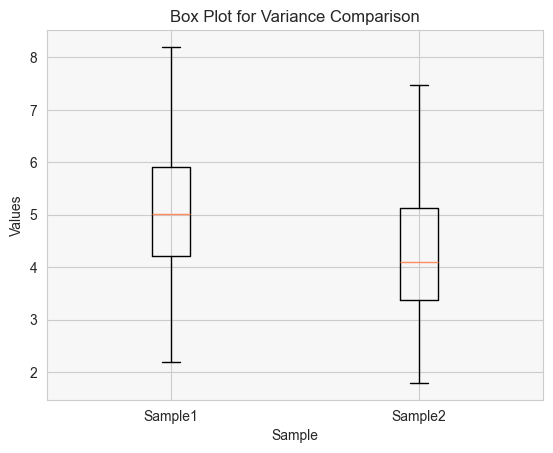

In [ ]:
# Boxplot --> help us to understand the visual comparison of sample1 and sample2 variance(spread)

plt.boxplot([sample1, sample2], labels=['Sample1', 'Sample2'])
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Box Plot for Variance Comparison')
plt.show()


In [ ]:
# Levene Test:

statistic, p_value = stats.levene(sample1, sample2)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Variances are likely unequal.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that the variances of the two groups are different. They can have Equal Variance.")


p_value: 0.6997680443682244
Fail to reject H₀: There isn't enough evidence to decide that the variances of the two groups are different. They can have Equal Variance.


* **Conclusion based on these considerations:**

    **As the variances are homogeneous and the sample size is large enough (ideally 30 or more per group), then a t-test (Student's t-test ) is appropriate. As per hypothesis, we will go for Two-tailed Test.**
  

**Step3: Set the Significance Level (α) = 0.05**
  


In [ ]:
alpha=0.05

**Step4: Compute the p - value ( perform the Statistical Test - Two-tailed t-test )**

In [ ]:
statistic, p_val = stats.ttest_ind(sample1,sample2)

print(f"p_val: {p_val}")

if p_val<alpha:
    print("There's evidence of a significant difference. Mean of sample1 != Mean of sample2")
else:
    print("Mean of sample1 == Mean of Sample2")

p_val: 0.0
There's evidence of a significant difference. Mean of sample1 != Mean of sample2


In [ ]:
mean_sample1 = trip_delhivery_df_transformed["actual_time_aggregated_value"].mean()

mean_sample2 = trip_delhivery_df_transformed["osrm_time_aggregated_value"].mean()

mean_sample1, mean_sample2

(5.127997370578506, 4.2956932340711145)

**Final Conclusion of Hypothesis Test 1: Results of Travel Time Comparison**

The t-test results indicate a statistically significant difference between the means of `actual_time_aggregated_value` and `osrm_time_aggregated_value`. This suggests that travel times estimated by the actual data are systematically different from those estimated by OSRM.


**Possible Reasons for the Difference:**

* **Data Accuracy:** Real-world factors like traffic, weather, or road closures might not be captured by OSRM.
* **Model Accuracy:** OSRM's routing algorithm might not perfectly reflect real-world travel patterns.
* **Data Granularity:** Mismatches in how travel times are aggregated between the sources could exist.

**Further Exploration:**

* **Domain Knowledge:** Consider incorporating expert knowledge about the transportation system to understand potential reasons for the observed difference.

By following these recommendations, we can gain a deeper understanding of the discrepancies between the two travel time estimates and make informed decisions about which method to use or how to improve their accuracy.


--------

### 2. actual_time aggregated value and segment actual time aggregated value.

In [ ]:
sample1 = trip_delhivery_df_transformed["actual_time_aggregated_value"]

sample2 = trip_delhivery_df_transformed["segment_actual_time_aggregated_value"]

**Step1: suitable hypothesis test to consider:**
  
* **Null Hypothesis (H0):** Mean of sample1 == sample2
      
* **Alternate Hypothesis(H1):** Mean of sample1 != sample2

In [ ]:
# size of samples

len(sample1), len(sample2)

(14817, 14817)

**Step2: Choose an Appropriate Statistical Test and Select the left / right / two-tailed test as per the hypothesis**

* Checking the Distribution(normal, non-normal) of Sample1 and Sample2

    1. Kdeplot:
    2. QQ Plot:
    3. shapiro Test:

* Checking the Variance of Sample1 and Sample2

    1. Boxplot
    2. Levene's test

* Conclusion based on these considerations:

    * If the variances are homogeneous and the sample size is large enough (ideally 30 or more per group), then a t-test (Student's t-test ) will be appropriate.
    * However, if the variances are unequal or the sample size is smaller, consider using non-parametric tests like the Mann-Whitney U test, which are less sensitive to these issues.


* As per hypothesis, we will go for Two-tailed Test.

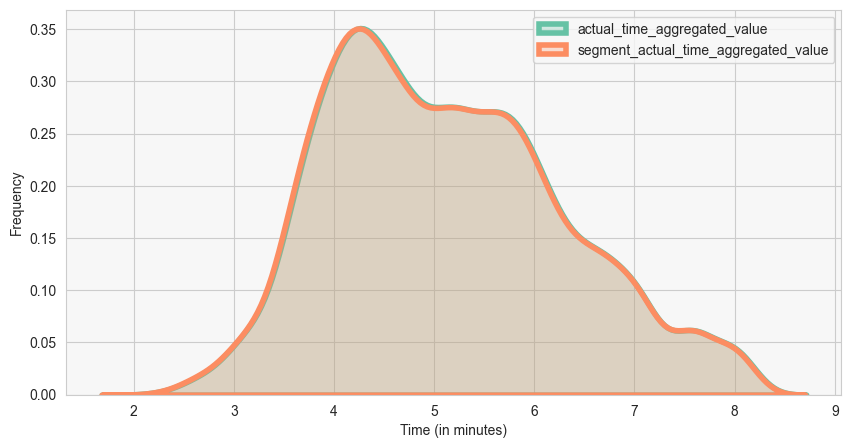

In [ ]:
# 1. visualization: kdeplot of sample1 AND sample2

plt.figure(figsize=(10,5))
sns.kdeplot(sample1,label="actual_time_aggregated_value",fill=True, linewidth=4)
sns.kdeplot(sample2,label="segment_actual_time_aggregated_value",fill=True, linewidth=4)
plt.legend()
plt.xlabel("Time (in minutes)")
plt.ylabel("Frequency")

plt.show()

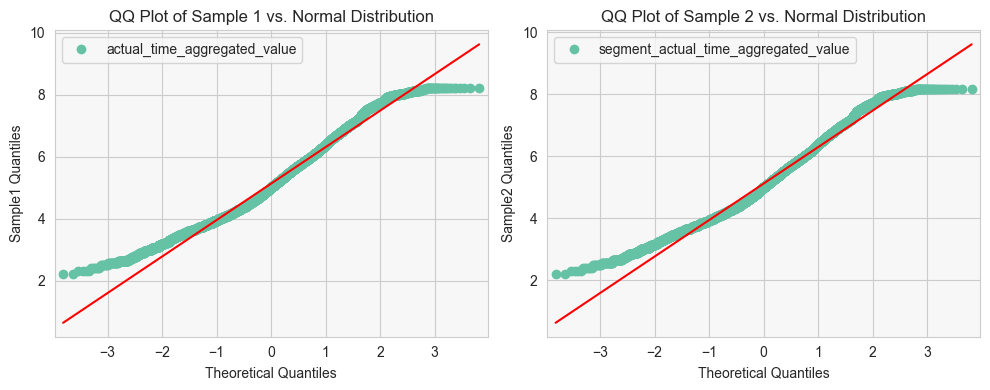

In [ ]:
# QQ Plot:
# import statsmodels.api as sm

plt.figure(figsize=(10, 4))  # Optional: Adjust figure size

plt.subplot(1, 2, 1)
qqplot(sample1, line='s',ax=plt.gca(),label="actual_time_aggregated_value")  # Red reference line
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample1 Quantiles')
plt.title('QQ Plot of Sample 1 vs. Normal Distribution')
plt.legend()

plt.subplot(1, 2, 2)
qqplot(sample2, line='s',ax=plt.gca(),label="segment_actual_time_aggregated_value")  # Red reference line
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample2 Quantiles')
plt.title('QQ Plot of Sample 2 vs. Normal Distribution')
plt.legend()

plt.tight_layout()  # Adjust spacing between plots (optional)
plt.show()

In [ ]:
# shapiro Test : Sample1

statistic, p_value = shapiro(sample1)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Sample1 doesnot follow the Normal Distribution.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that Sample1 doesnot follow the Normal Distribution")

p_value: 1.2283132117758636e-41
Reject H₀: Sample1 doesnot follow the Normal Distribution.


In [ ]:
# shapiro Test : Sample2

statistic, p_value = shapiro(sample2)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Sample2 doesnot follow the Normal Distribution.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that Sample2 doesnot follow the Normal Distribution")

p_value: 9.242378863828347e-42
Reject H₀: Sample2 doesnot follow the Normal Distribution.


**--> Above plots don't follow normal distribution. There is mild violation of Normal Distribution.**



* **Checking Variance of Sample1 and Sample2:***

In [ ]:
sample1.size

14817

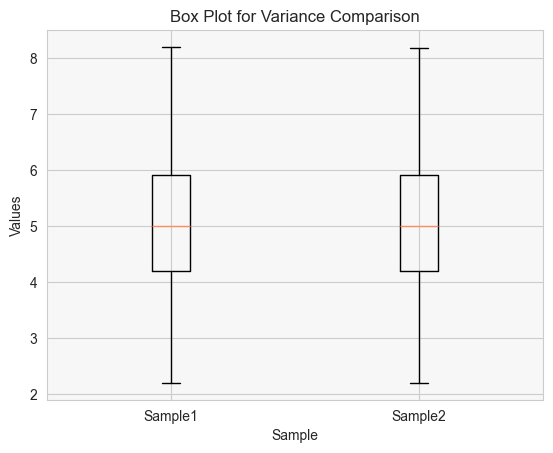

In [ ]:
# Boxplot --> help us to understand the visual comparison of sample1 and sample2 variance(spread)

plt.boxplot([sample1, sample2], labels=['Sample1', 'Sample2'])
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Box Plot for Variance Comparison')
plt.show()

In [ ]:
# Levene Test:

statistic, p_value = stats.levene(sample1, sample2)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Variances are likely unequal.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that the variances of the two groups are different. They can have Equal Variance.")


p_value: 0.8411836074690063
Fail to reject H₀: There isn't enough evidence to decide that the variances of the two groups are different. They can have Equal Variance.


* **Conclusion based on these considerations:**

    **As the variances are homogeneous and the sample size is large enough (ideally 30 or more per group), then a t-test (Student's t-test ) is appropriate. As per hypothesis, we will go for Two-tailed Test.**
  

**Step3: Set the Significance Level (α) = 0.05**
  


In [ ]:
alpha=0.05

**Step4: Compute the p - value ( perform the Statistical Test - Two-tailed t-test )**

In [ ]:
statistic, p_val = stats.ttest_ind(sample1,sample2)

print(f"p_val: {p_val}")

if p_val<alpha:
    print("There's evidence of a significant difference. Mean of sample1 != Mean of sample2")
else:
    print("Mean of sample1 == Mean of Sample2")

p_val: 0.4411810888414648
Mean of sample1 == Mean of Sample2


In [ ]:
mean_sample1 = trip_delhivery_df_transformed["actual_time_aggregated_value"].mean()

mean_sample2 = trip_delhivery_df_transformed["segment_actual_time_aggregated_value"].mean()

mean_sample1, mean_sample2

(5.127997370578506, 5.117460734293874)

**Final Conclusion of Hypothesis Test 2:**

--> There is no evidence of a significant difference between the means of actual_time_aggregated_value and segment_actual_time_aggregated_value:**


--> The average travel times across both methods (`actual_time_aggregated_value and segment_actual_time_aggregated_value`) seem to be statistically similar.

---------

### 3. OSRM distance aggregated value and segment OSRM distance aggregated value.

In [ ]:
trip_delhivery_df_transformed.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time_aggregated_value,osrm_time_aggregated_value,osrm_distance_aggregated_value,segment_actual_time_aggregated_value,segment_osrm_time_aggregated_value,segment_osrm_distance_aggregated_value,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),7.722678,6.715060,7.353722,6.610696,6.899071,7.344719,6.915723,7.185745,7.723562,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),5.192957,4.293018,4.962845,4.219508,4.443956,4.948760,4.174387,4.433052,5.204007,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12


In [ ]:
sample1 = trip_delhivery_df_transformed["osrm_distance_aggregated_value"]

sample2 = trip_delhivery_df_transformed["segment_osrm_distance_aggregated_value"]

**Step1: suitable hypothesis test to consider:**
  
* **Null Hypothesis (H0):** Mean of sample1 == sample2
      
* **Alternate Hypothesis(H1):** Mean of sample1 != sample2

In [ ]:
# size of samples

len(sample1), len(sample2)

(14817, 14817)

**Step2: Choose an Appropriate Statistical Test and Select the left / right / two-tailed test as per the hypothesis**

* Checking the Distribution(normal, non-normal) of Sample1 and Sample2

    1. Kdeplot:
    2. QQ Plot:
    3. shapiro Test:

* Checking the Variance of Sample1 and Sample2

    1. Boxplot
    2. Levene's test

* Conclusion based on these considerations:

    * If the variances are homogeneous and the sample size is large enough (ideally 30 or more per group), then a t-test (Student's t-test ) will be appropriate.
    * However, if the variances are unequal or the sample size is smaller, consider using non-parametric tests like the Mann-Whitney U test, which are less sensitive to these issues.


* As per hypothesis, we will go for Two-tailed Test.

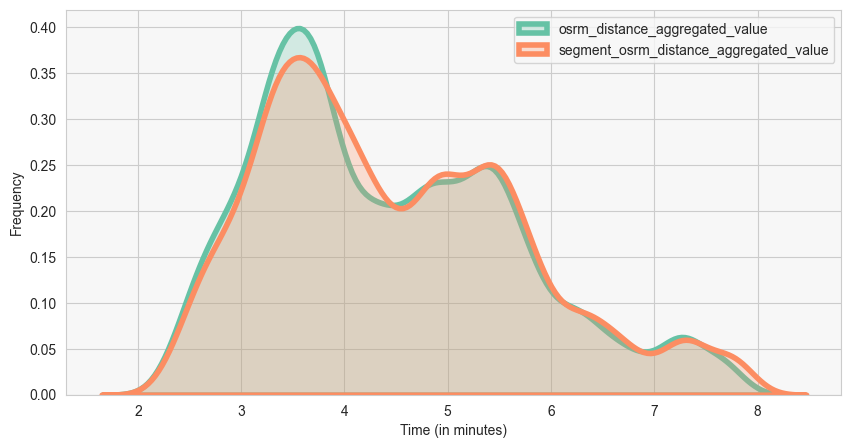

In [ ]:
# 1. visualization: kdeplot of sample1 AND sample2

plt.figure(figsize=(10,5))
sns.kdeplot(sample1,label="osrm_distance_aggregated_value",fill=True, linewidth=4)
sns.kdeplot(sample2,label="segment_osrm_distance_aggregated_value",fill=True, linewidth=4)
plt.legend()
plt.xlabel("Time (in minutes)")
plt.ylabel("Frequency")

plt.show()

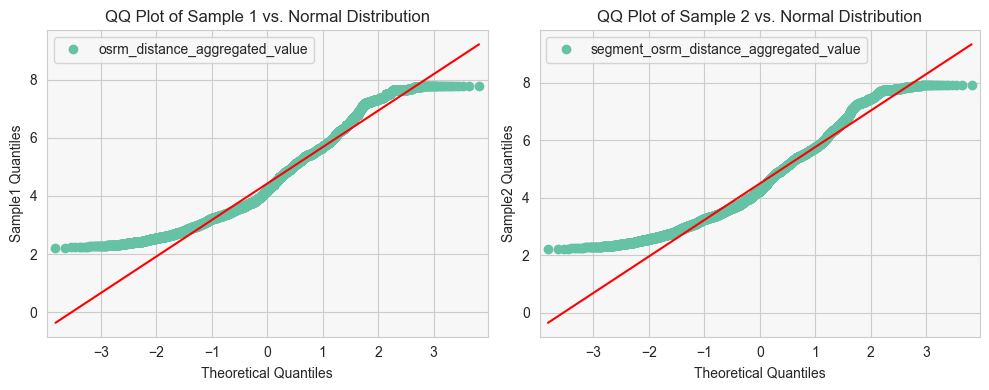

In [ ]:
# QQ Plot:
# import statsmodels.api as sm

plt.figure(figsize=(10, 4))  # Optional: Adjust figure size

plt.subplot(1, 2, 1)
qqplot(sample1, line='s',ax=plt.gca(),label="osrm_distance_aggregated_value")  # Red reference line
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample1 Quantiles')
plt.title('QQ Plot of Sample 1 vs. Normal Distribution')
plt.legend()

plt.subplot(1, 2, 2)
qqplot(sample2, line='s',ax=plt.gca(),label="segment_osrm_distance_aggregated_value")  # Red reference line
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample2 Quantiles')
plt.title('QQ Plot of Sample 2 vs. Normal Distribution')
plt.legend()

plt.tight_layout()  # Adjust spacing between plots (optional)
plt.show()

In [ ]:
# shapiro Test : Sample1

statistic, p_value = shapiro(sample1)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Sample1 doesnot follow the Normal Distribution.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that Sample1 doesnot follow the Normal Distribution")

p_value: 1.9433282140247564e-53
Reject H₀: Sample1 doesnot follow the Normal Distribution.


In [ ]:
# shapiro Test : Sample2

statistic, p_value = shapiro(sample2)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Sample2 doesnot follow the Normal Distribution.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that Sample2 doesnot follow the Normal Distribution")

p_value: 5.065718424402446e-52
Reject H₀: Sample2 doesnot follow the Normal Distribution.


**--> Above plots don't follow normal distribution. There is mild violation of Normal Distribution.**



* **Checking Variance of Sample1 and Sample2:***

In [ ]:
sample1.size

14817

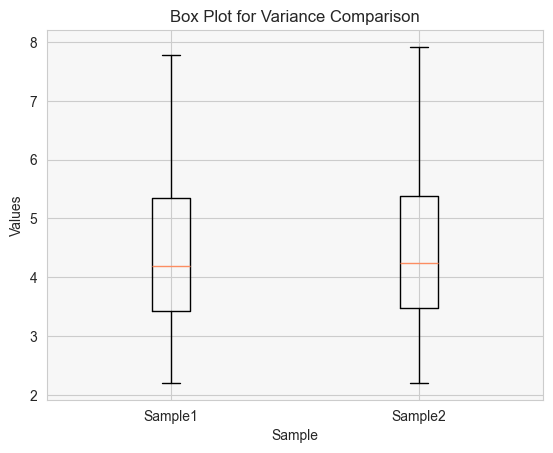

In [ ]:
# Boxplot --> help us to understand the visual comparison of sample1 and sample2 variance(spread)

plt.boxplot([sample1, sample2], labels=['Sample1', 'Sample2'])
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Box Plot for Variance Comparison')
plt.show()

In [ ]:
# Levene Test:

statistic, p_value = stats.levene(sample1, sample2)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Variances are likely unequal.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that the variances of the two groups are different. They can have Equal Variance.")


p_value: 0.6413472326078333
Fail to reject H₀: There isn't enough evidence to decide that the variances of the two groups are different. They can have Equal Variance.


* **Conclusion based on these considerations:**

    **As the variances are homogeneous and the sample size is large enough (ideally 30 or more per group), then a t-test (Student's t-test ) is appropriate. As per hypothesis, we will go for Two-tailed Test.**
  

**Step3: Set the Significance Level (α) = 0.05**
  


In [ ]:
alpha=0.05

**Step4: Compute the p - value ( perform the Statistical Test - Two-tailed t-test )**

In [ ]:
statistic, p_val = stats.ttest_ind(sample1,sample2)

print(f"p_val: {p_val}")

if p_val<alpha:
    print("There's evidence of a significant difference. Mean of sample1 != Mean of sample2")
else:
    print("Mean of sample1 == Mean of Sample2")

p_val: 3.1284037639133354e-05
There's evidence of a significant difference. Mean of sample1 != Mean of sample2


In [ ]:
mean_sample1 = trip_delhivery_df_transformed["actual_time_aggregated_value"].mean()

mean_sample2 = trip_delhivery_df_transformed["segment_actual_time_aggregated_value"].mean()

mean_sample1, mean_sample2

(5.127997370578506, 5.117460734293874)

In [ ]:
# Perform the non-parametric - Mann-Whitney U test

u, p_value = mannwhitneyu(sample1, sample2)

# Interpret the results
if p_value < 0.05:
  print("There's evidence of a significant difference in medians (p-value:", p_value, ")")
else:
  print("No evidence of a significant difference in medians (p-value:", p_value, ")")


There's evidence of a significant difference in medians (p-value: 1.177501964270322e-05 )


**Final Conclusion of Hypothesis Test 3:**

--> The means (5.127 and 5.117) are very close, suggesting little practical difference between the samples.

However, the large sample size (14,000) makes the t-test very sensitive to even this small difference. The t-test picks up on this slight difference between the means of osrm_distance_aggregated_value and segment_osrm_distance_aggregated_value as statistically significant, even though it might not be meaningful in real-world terms.

--> The average travel distance across both methods (`osrm_distance_aggregated_value and segment_osrm_distance_aggregated_value`) seem to be statistically different.

----------

### 4. OSRM time aggregated value and segment OSRM time aggregated value.

In [ ]:
trip_delhivery_df_transformed.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time_aggregated_value,osrm_time_aggregated_value,osrm_distance_aggregated_value,segment_actual_time_aggregated_value,segment_osrm_time_aggregated_value,segment_osrm_distance_aggregated_value,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),7.722678,6.715060,7.353722,6.610696,6.899071,7.344719,6.915723,7.185745,7.723562,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),5.192957,4.293018,4.962845,4.219508,4.443956,4.948760,4.174387,4.433052,5.204007,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12


In [ ]:
sample1 = trip_delhivery_df_transformed["osrm_time_aggregated_value"]

sample2 = trip_delhivery_df_transformed["segment_osrm_time_aggregated_value"]

**Step1: suitable hypothesis test to consider:**
  
* **Null Hypothesis (H0):** Mean of sample1 == sample2
      
* **Alternate Hypothesis(H1):** Mean of sample1 != sample2

In [ ]:
# size of samples

len(sample1), len(sample2)

(14817, 14817)

**Step2: Choose an Appropriate Statistical Test and Select the left / right / two-tailed test as per the hypothesis**

* Checking the Distribution(normal, non-normal) of Sample1 and Sample2

    1. Kdeplot:
    2. QQ Plot:
    3. shapiro Test:

* Checking the Variance of Sample1 and Sample2

    1. Boxplot
    2. Levene's test

* Conclusion based on these considerations:

    * If the variances are homogeneous and the sample size is large enough (ideally 30 or more per group), then a t-test (Student's t-test ) will be appropriate.
    * However, if the variances are unequal or the sample size is smaller, consider using non-parametric tests like the Mann-Whitney U test, which are less sensitive to these issues.


* As per hypothesis, we will go for Two-tailed Test.

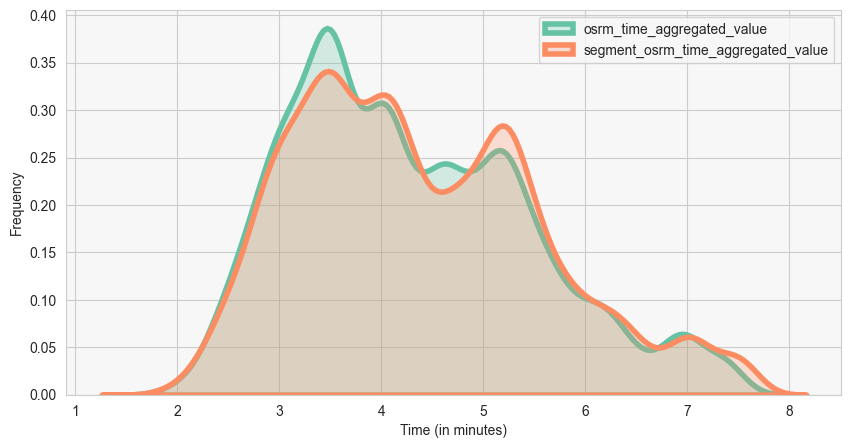

In [ ]:
# 1. visualization: kdeplot of sample1 AND sample2

plt.figure(figsize=(10,5))
sns.kdeplot(sample1,label="osrm_time_aggregated_value",fill=True, linewidth=4)
sns.kdeplot(sample2,label="segment_osrm_time_aggregated_value",fill=True, linewidth=4)
plt.legend()
plt.xlabel("Time (in minutes)")
plt.ylabel("Frequency")

plt.show()

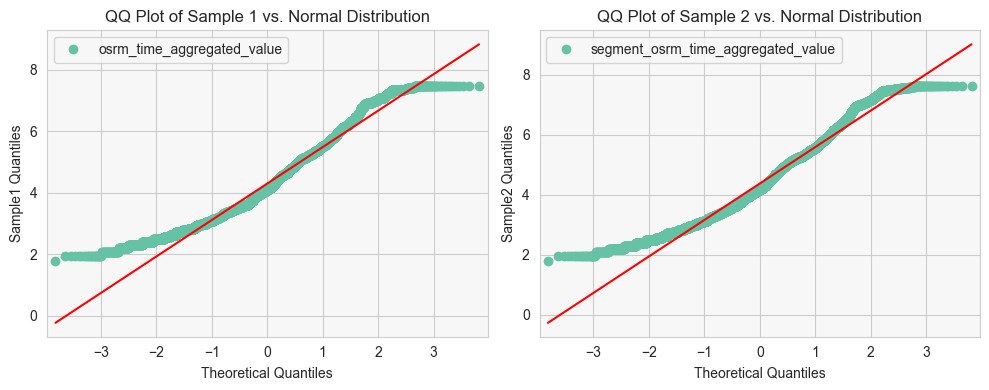

In [ ]:
# QQ Plot:
# import statsmodels.api as sm

plt.figure(figsize=(10, 4))  # Optional: Adjust figure size

plt.subplot(1, 2, 1)
qqplot(sample1, line='s',ax=plt.gca(),label="osrm_time_aggregated_value")  # Red reference line
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample1 Quantiles')
plt.title('QQ Plot of Sample 1 vs. Normal Distribution')
plt.legend()

plt.subplot(1, 2, 2)
qqplot(sample2, line='s',ax=plt.gca(),label="segment_osrm_time_aggregated_value")  # Red reference line
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample2 Quantiles')
plt.title('QQ Plot of Sample 2 vs. Normal Distribution')
plt.legend()

plt.tight_layout()  # Adjust spacing between plots (optional)
plt.show()

In [ ]:
# shapiro Test : Sample1

statistic, p_value = shapiro(sample1)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Sample1 doesnot follow the Normal Distribution.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that Sample1 doesnot follow the Normal Distribution")

p_value: 1.857427167701707e-49
Reject H₀: Sample1 doesnot follow the Normal Distribution.


In [ ]:
# shapiro Test : Sample2

statistic, p_value = shapiro(sample2)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Sample2 doesnot follow the Normal Distribution.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that Sample2 doesnot follow the Normal Distribution")

p_value: 1.0004593399760744e-47
Reject H₀: Sample2 doesnot follow the Normal Distribution.


**--> Above plots don't follow normal distribution. There is mild violation of Normal Distribution.**



* **Checking Variance of Sample1 and Sample2:***

In [ ]:
sample1.size

14817

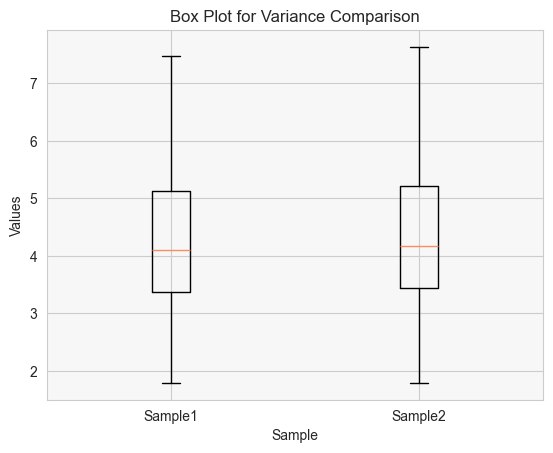

In [ ]:
# Boxplot --> help us to understand the visual comparison of sample1 and sample2 variance(spread)

plt.boxplot([sample1, sample2], labels=['Sample1', 'Sample2'])
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Box Plot for Variance Comparison')
plt.show()

In [ ]:
# Levene Test:

statistic, p_value = stats.levene(sample1, sample2)

print(f"p_value: {p_value}")
if p_value < 0.05:
  print("Reject H₀: Variances are likely unequal.")
else:
  print("Fail to reject H₀: There isn't enough evidence to decide that the variances of the two groups are different. They can have Equal Variance.")


p_value: 0.0025652655245210812
Reject H₀: Variances are likely unequal.


* **Conclusion based on these considerations:**

    **As the variances are not homogeneous, then a the non-parametric - Mann-Whitney U test is appropriate. As per hypothesis, we will go for Two-tailed Test.**
  

**Step3: Set the Significance Level (α) = 0.05**
  


In [ ]:
alpha=0.05

**Step4: Compute the p - value ( perform the Statistical Test - Two-tailed t-test )**

In [ ]:
median_sample1 = sample1.median()

median_sample2 = sample2.median()

median_sample1, median_sample2

(4.0943445622221, 4.174387269895637)

In [ ]:
# Perform the non-parametric - Mann-Whitney U test

u, p_value = mannwhitneyu(sample1, sample2)

# Interpret the results
if p_value < 0.05:
  print("There's evidence of a significant difference in medians (p-value:", p_value, ")")
else:
  print("No evidence of a significant difference in medians (p-value:", p_value, ")")


There's evidence of a significant difference in medians (p-value: 2.2168761713867976e-07 )


**Final Conclusion of Hypothesis Test 4:**

--> There is evidence of a significant difference between the median of osrm_time_aggregated_value and segment_osrm_time_aggregated_value.


--> The Median travel times across both methods (`osrm_time_aggregated_value and segment_osrm_time_aggregated_value`) seem to be statistically similar.

---------

# one-hot encoding on categorical features.


In [ ]:
trip_delhivery_df_transformed.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time_aggregated_value,osrm_time_aggregated_value,osrm_distance_aggregated_value,segment_actual_time_aggregated_value,segment_osrm_time_aggregated_value,segment_osrm_distance_aggregated_value,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),7.722678,6.715060,7.353722,6.610696,6.899071,7.344719,6.915723,7.185745,7.723562,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),5.192957,4.293018,4.962845,4.219508,4.443956,4.948760,4.174387,4.433052,5.204007,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12


In [ ]:
categorical_features = trip_delhivery_df_transformed.select_dtypes(exclude=[np.number,"datetime64[ns]"]).columns.tolist()

categorical_features

['trip_uuid',
 'data',
 'route_schedule_uuid',
 'route_type',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'source_city',
 'source_state',
 'destination_city',
 'destination_state',
 'trip_creation_month',
 'trip_creation_year',
 'trip_creation_day']

In [ ]:
trip_delhivery_df_transformed[categorical_features].nunique()

trip_uuid              14817
data                       2
route_schedule_uuid     1504
route_type                 2
source_center            868
source_name              865
destination_center       956
destination_name         948
source_city              641
source_state              30
destination_city         731
destination_state         33
trip_creation_month        2
trip_creation_year         1
trip_creation_day         22
dtype: int64

* **High Cardinatily Features** : ["trip_uuid","route_schedule_uuid","source_center","source_name","destination_center",
  "destination_name","source_city",destination_city"]

  as we don't know the importance of these features and due to high cardinality , we are not encoding them as of now.Once, we know the importance of Feature then we can consider those important feature for encoding later on.

* **Low Cardinality Features** : ["data","route_type","source_state","destination_state"].We will perform **One hot Encoding** for these Low Cardinality Features.

  * Features : ["trip_creation_month","trip_creation_day"] are ordinal categorical data. since, we will perform **Label Encoding** for them.

* **One hot Encoding:**

In [ ]:
# feature : data

ohe = OneHotEncoder(sparse_output=False, dtype=int)
data = ohe.fit_transform(trip_delhivery_df_transformed['data'].to_frame())
encoded = pd.DataFrame(data, columns=ohe.get_feature_names_out(['data']))
trip_delhivery_df_transformed = pd.concat([trip_delhivery_df_transformed, encoded], axis=1)

In [ ]:
encoded.head(2)

,data_test,data_training
0,0,1
1,0,1


In [ ]:
trip_delhivery_df_transformed.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time_aggregated_value,osrm_time_aggregated_value,osrm_distance_aggregated_value,segment_actual_time_aggregated_value,segment_osrm_time_aggregated_value,segment_osrm_distance_aggregated_value,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day,data_test,data_training
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),7.722678,6.715060,7.353722,6.610696,6.899071,7.344719,6.915723,7.185745,7.723562,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12,0,1
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),5.192957,4.293018,4.962845,4.219508,4.443956,4.948760,4.174387,4.433052,5.204007,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12,0,1


In [ ]:
trip_delhivery_df_transformed["data"].value_counts()

data
training    10654
test         4163
Name: count, dtype: int64

In [ ]:
trip_delhivery_df_transformed["data_test"].value_counts()

data_test
0    10654
1     4163
Name: count, dtype: int64

In [ ]:
trip_delhivery_df_transformed["data_training"].value_counts()

data_training
1    10654
0     4163
Name: count, dtype: int64

-------

In [ ]:
# feature : route_type

encoded = pd.get_dummies(trip_delhivery_df_transformed['route_type'], prefix='route_type',dtype=int)
trip_delhivery_df_transformed = pd.concat([trip_delhivery_df_transformed, encoded], axis=1)


In [ ]:
encoded.head(4)

,route_type_Carting,route_type_FTL
0,0,1
1,1,0
2,0,1
3,1,0


In [ ]:
trip_delhivery_df_transformed.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time_aggregated_value,osrm_time_aggregated_value,osrm_distance_aggregated_value,segment_actual_time_aggregated_value,segment_osrm_time_aggregated_value,segment_osrm_distance_aggregated_value,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),7.722678,6.715060,7.353722,6.610696,6.899071,7.344719,6.915723,7.185745,7.723562,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12,0,1,0,1
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),5.192957,4.293018,4.962845,4.219508,4.443956,4.948760,4.174387,4.433052,5.204007,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12,0,1,1,0


--------

In [ ]:
# feature : source_state

encoded = pd.get_dummies(trip_delhivery_df_transformed['source_state'], prefix='source_state',dtype=int)
trip_delhivery_df_transformed = pd.concat([trip_delhivery_df_transformed, encoded], axis=1)


In [ ]:
encoded.head(4)

,source_state_Andhra Pradesh,source_state_Arunachal Pradesh,source_state_Assam,source_state_Bihar,source_state_Chandigarh,source_state_Chhattisgarh,source_state_Dadra and Nagar Haveli,source_state_Delhi,source_state_Goa,source_state_Gujarat,source_state_Haryana,source_state_Himachal Pradesh,source_state_Jammu & Kashmir,source_state_Jharkhand,source_state_Karnataka,source_state_Kerala,source_state_Madhya Pradesh,source_state_Maharashtra,source_state_Mizoram,source_state_Nagaland,source_state_Orissa,source_state_Pondicherry,source_state_Punjab,source_state_Rajasthan,source_state_Tamil Nadu,source_state_Telangana,source_state_Unknown_Source_Nam,source_state_Uttar Pradesh,source_state_Uttarakhand,source_state_West Bengal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
trip_delhivery_df_transformed.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time_aggregated_value,osrm_time_aggregated_value,osrm_distance_aggregated_value,segment_actual_time_aggregated_value,segment_osrm_time_aggregated_value,segment_osrm_distance_aggregated_value,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day,data_test,data_training,route_type_Carting,route_type_FTL,source_state_Andhra Pradesh,source_state_Arunachal Pradesh,source_state_Assam,source_state_Bihar,source_state_Chandigarh,source_state_Chhattisgarh,source_state_Dadra and Nagar Haveli,source_state_Delhi,source_state_Goa,source_state_Gujarat,source_state_Haryana,source_state_Himachal Pradesh,source_state_Jammu & Kashmir,source_state_Jharkhand,source_state_Karnataka,source_state_Kerala,source_state_Madhya Pradesh,source_state_Maharashtra,source_state_Mizoram,source_state_Nagaland,source_state_Orissa,source_state_Pondicherry,source_state_Punjab,source_state_Rajasthan,source_state_Tamil Nadu,source_state_Telangana,source_state_Unknown_Source_Nam,source_state_Uttar Pradesh,source_state_Uttarakhand,source_state_West Bengal
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),7.722678,6.715060,7.353722,6.610696,6.899071,7.344719,6.915723,7.185745,7.723562,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),5.192957,4.293018,4.962845,4.219508,4.443956,4.948760,4.174387,4.433052,5.204007,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


--------

In [ ]:
# feature : destination_state

encoded = pd.get_dummies(trip_delhivery_df_transformed["destination_state"],prefix="destination_state",dtype=int)
trip_delhivery_df_transformed = pd.concat([trip_delhivery_df_transformed,encoded],axis=1)

In [ ]:
encoded.head()

,destination_state_Andhra Pradesh,destination_state_Arunachal Pradesh,destination_state_Assam,destination_state_Bihar,destination_state_Chandigarh,destination_state_Chhattisgarh,destination_state_Dadra and Nagar Haveli,destination_state_Daman & Diu,destination_state_Delhi,destination_state_Goa,destination_state_Gujarat,destination_state_Haryana,destination_state_Himachal Pradesh,destination_state_Jammu & Kashmir,destination_state_Jharkhand,destination_state_Karnataka,destination_state_Kerala,destination_state_Madhya Pradesh,destination_state_Maharashtra,destination_state_Meghalaya,destination_state_Mizoram,destination_state_Nagaland,destination_state_Orissa,destination_state_Pondicherry,destination_state_Punjab,destination_state_Rajasthan,destination_state_Tamil Nadu,destination_state_Telangana,destination_state_Tripura,destination_state_Unknown_Destination_Nam,destination_state_Uttar Pradesh,destination_state_Uttarakhand,destination_state_West Bengal
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
trip_delhivery_df_transformed.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time_aggregated_value,osrm_time_aggregated_value,osrm_distance_aggregated_value,segment_actual_time_aggregated_value,segment_osrm_time_aggregated_value,segment_osrm_distance_aggregated_value,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day,data_test,data_training,route_type_Carting,route_type_FTL,source_state_Andhra Pradesh,source_state_Arunachal Pradesh,source_state_Assam,source_state_Bihar,source_state_Chandigarh,source_state_Chhattisgarh,source_state_Dadra and Nagar Haveli,source_state_Delhi,source_state_Goa,source_state_Gujarat,source_state_Haryana,source_state_Himachal Pradesh,source_state_Jammu & Kashmir,source_state_Jharkhand,source_state_Karnataka,source_state_Kerala,source_state_Madhya Pradesh,source_state_Maharashtra,source_state_Mizoram,source_state_Nagaland,source_state_Orissa,source_state_Pondicherry,source_state_Punjab,source_state_Rajasthan,source_state_Tamil Nadu,source_state_Telangana,source_state_Unknown_Source_Nam,source_state_Uttar Pradesh,source_state_Uttarakhand,source_state_West Bengal,destination_state_Andhra Pradesh,destination_state_Arunachal Pradesh,destination_state_Assam,destination_state_Bihar,destination_state_Chandigarh,destination_state_Chhattisgarh,destination_state_Dadra and Nagar Haveli,destination_state_Daman & Diu,destination_state_Delhi,destination_state_Goa,destination_state_Gujarat,destination_state_Haryana,destination_state_Himachal Pradesh,destination_state_Jammu & Kashmir,destination_state_Jharkhand,destination_state_Karnataka,destination_state_Kerala,destination_state_Madhya Pradesh,destination_state_Maharashtra,destination_state_Meghalaya,destination_state_Mizoram,destination_state_Nagaland,destination_state_Orissa,destination_state_Pondicherry,destination_state_Punjab,destination_state_Rajasthan,destination_state_Tamil Nadu,destination_state_Telangana,destination_state_Tripura,destination_state_Unknown_Destination_Nam,destination_state_Uttar Pradesh,destination_state_Uttarakhand,destination_state_West Bengal
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),7.722678,6.715060,7.353722,6.610696,6.899071,7.344719,6.915723,7.185745,7.723562,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),5.192957,4.293018,4.962845,4.219508,4.443956,4.948760,4.174387,4.433052,5.204007,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* **Label Encoding**:

In [ ]:
# feature : trip_creation_month

label_encoder = LabelEncoder()
trip_delhivery_df_transformed['trip_creation_month_encoded'] = label_encoder.fit_transform(trip_delhivery_df_transformed['trip_creation_month'])

In [ ]:
trip_delhivery_df_transformed[['trip_creation_month_encoded','trip_creation_month']].sample(5)

,trip_creation_month_encoded,trip_creation_month
688,1,Sep
9339,1,Sep
7778,1,Sep
2107,1,Sep
3773,1,Sep


In [ ]:
# feature: trip_creation_day

label_encoder = LabelEncoder()
trip_delhivery_df_transformed['trip_creation_day_encoded'] = label_encoder.fit_transform(trip_delhivery_df_transformed['trip_creation_day'])

In [ ]:
trip_delhivery_df_transformed[['trip_creation_day_encoded','trip_creation_day']].sample(3)

,trip_creation_day_encoded,trip_creation_day
5186,8,19
5122,8,19
13404,0,1


# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [ ]:
numeric_cols = trip_delhivery_df_transformed.columns[9:18].tolist()

numeric_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time_aggregated_value',
 'osrm_time_aggregated_value',
 'osrm_distance_aggregated_value',
 'segment_actual_time_aggregated_value',
 'segment_osrm_time_aggregated_value',
 'segment_osrm_distance_aggregated_value',
 'od_time_diff_hour']

In [ ]:
'''
Considering Model is sensitive for feature scaling.

After, log transformation and outlier Treatment:

    check Distribution and Outlier for each numerical column:

        1. If Distribution is normal then we will choose StandardScaler for scaling.
        2. If distribution is normal but having outliers then we will choose RobustScaler for scaling.
        3. If Distribution is not normal and not having outlier then we will choose RobustScaler for scaling.
        4. If Distribution is not Normal and have outlier then  we will choose RobustScaler for scaling.

'''

'\nConsidering Model is sensitive for feature scaling.\n\nAfter, log transformation and outlier Treatment: \n\n    check Distribution and Outlier for each numerical column:\n    \n        1. If Distribution is normal then we will choose StandardScaler for scaling.\n        2. If distribution is normal but having outliers then we will choose RobustScaler for scaling. \n        3. If Distribution is not normal and not having outlier then we will choose RobustScaler for scaling. \n        4. If Distribution is not Normal and have outlier then  we will choose RobustScaler for scaling. \n\n'

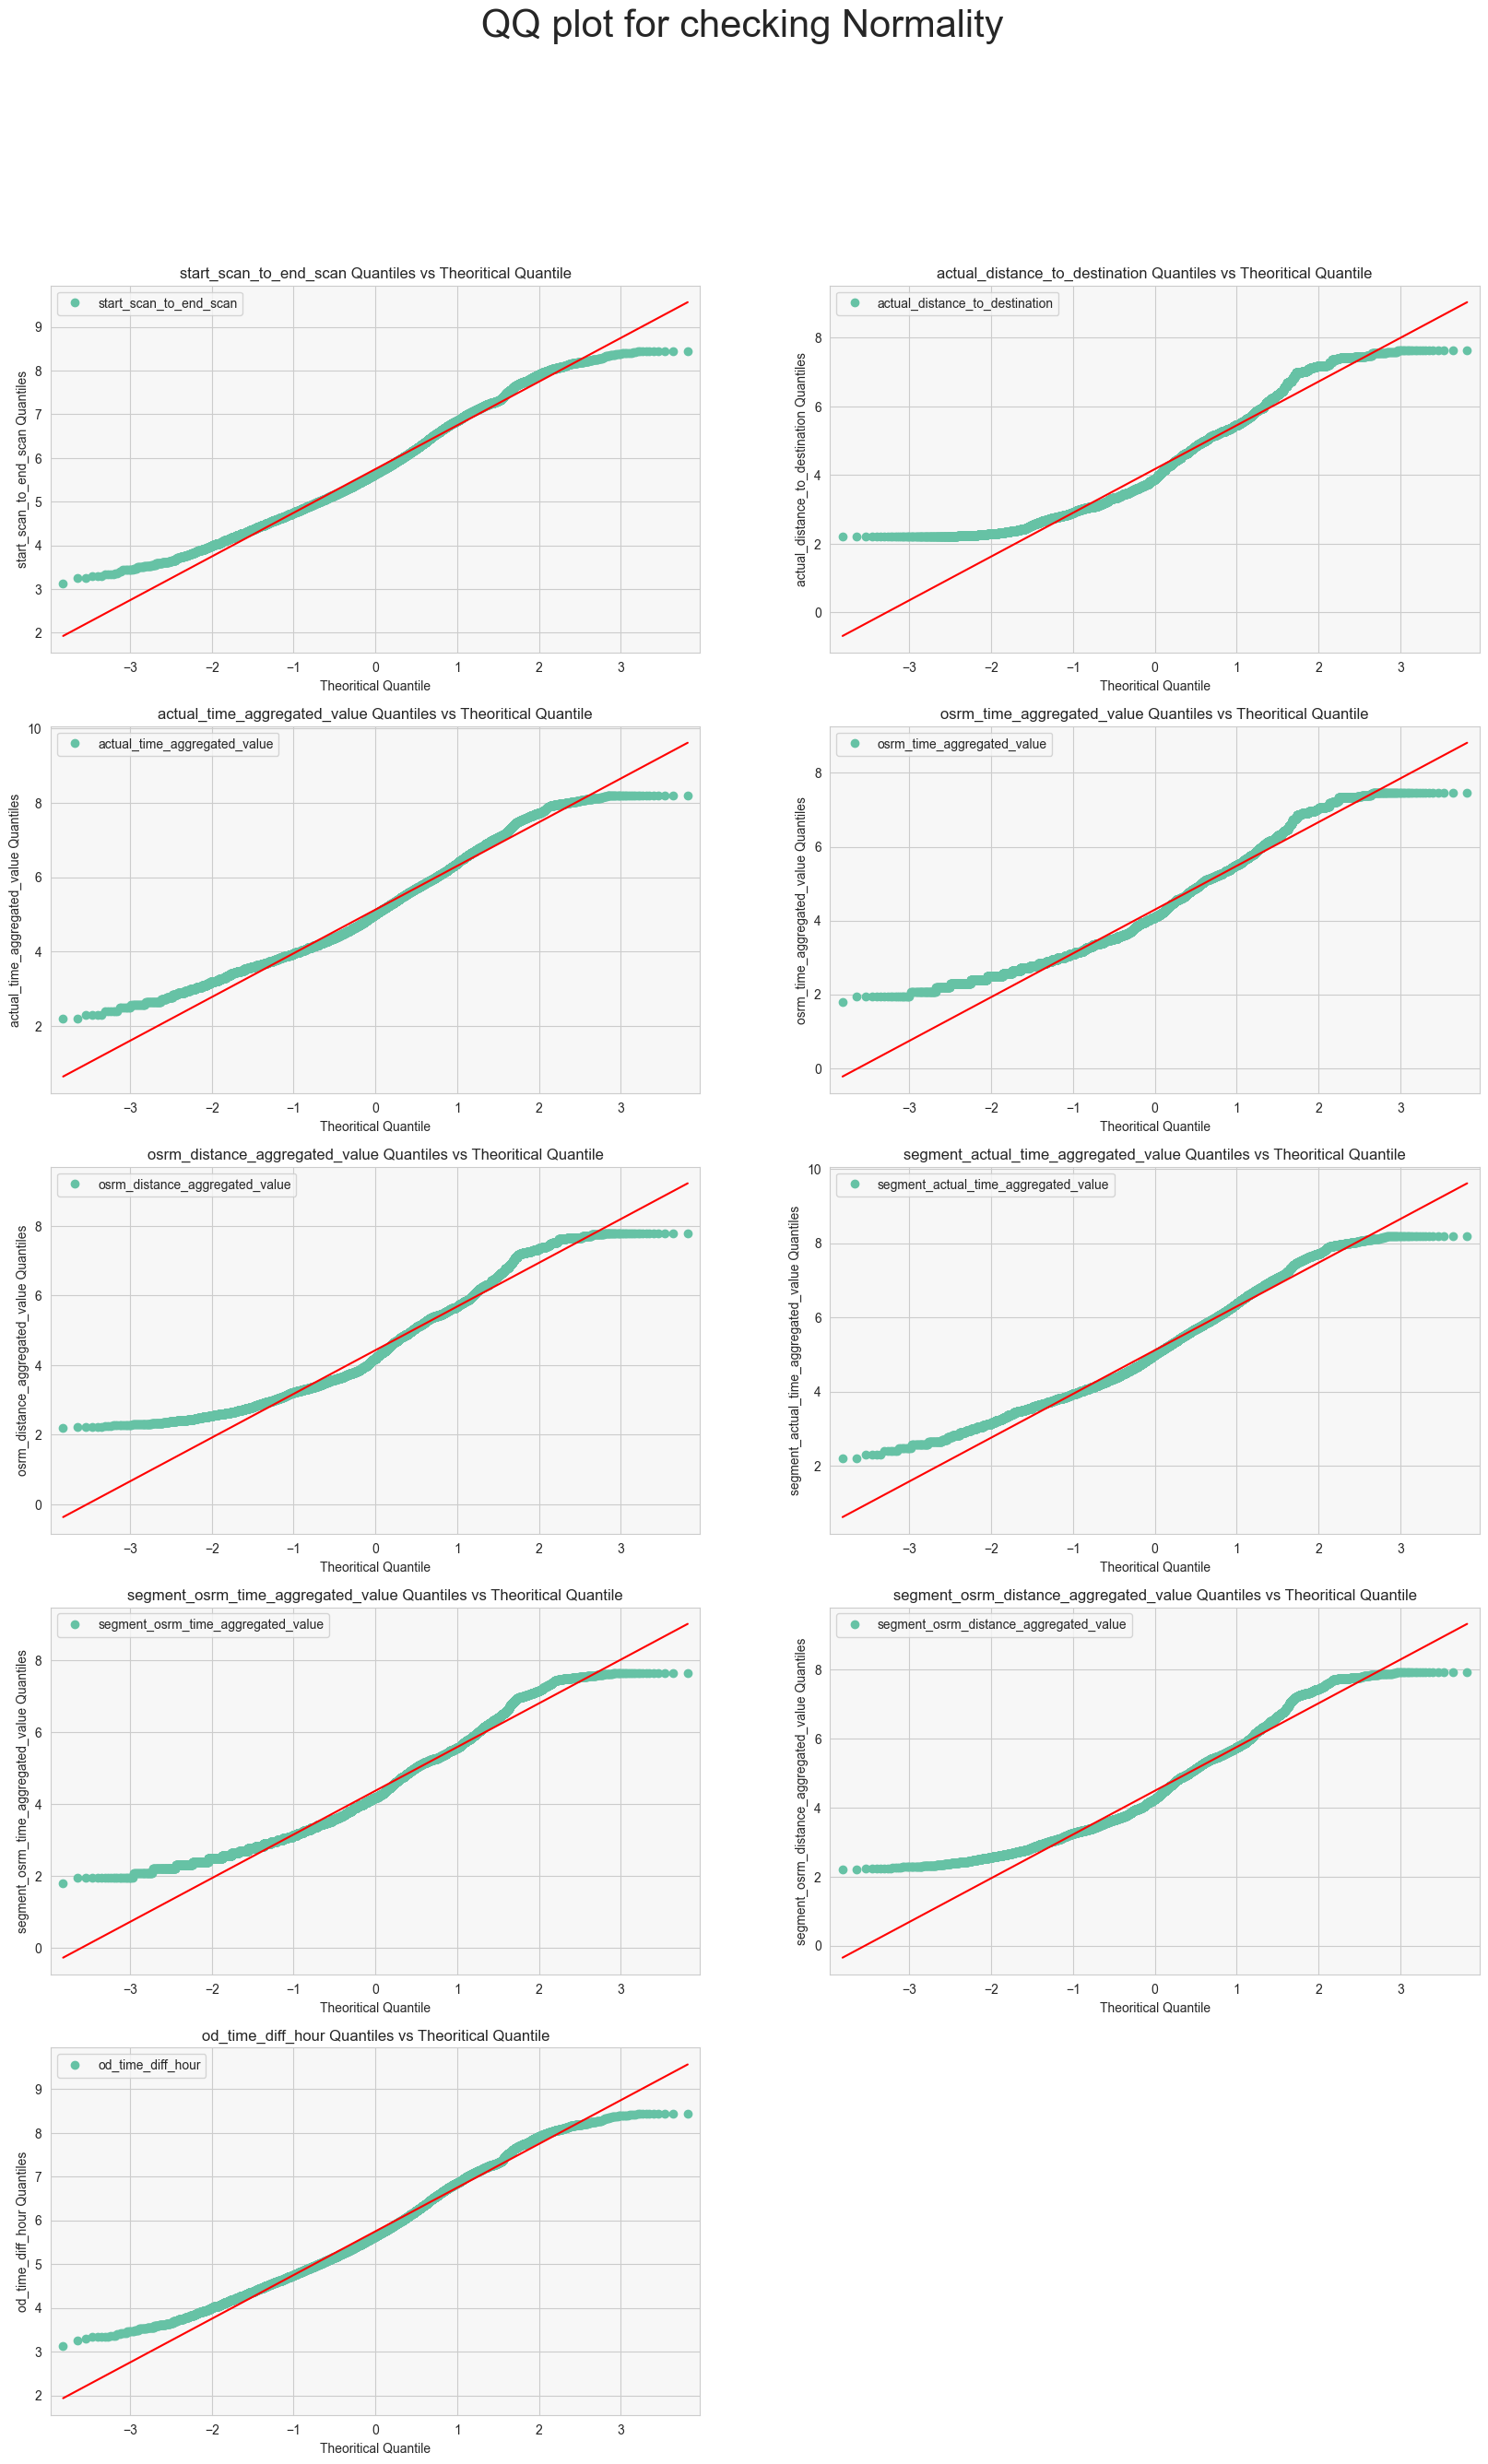

In [ ]:
# plotting QQ plot :

plt.figure(figsize=(20,30))
plt.suptitle("QQ plot for checking Normality",fontsize=30)
for i,col in enumerate(numeric_cols,1):
    plt.subplot(5,2,i)
    qqplot(trip_delhivery_df_transformed[col],line='s',ax=plt.gca(),label=col)
    plt.title(f"{col} Quantiles vs Theoritical Quantile")
    plt.xlabel("Theoritical Quantile")
    plt.ylabel(f"{col} Quantiles")
    plt.legend()
# plt.tight_layout()
plt.show()

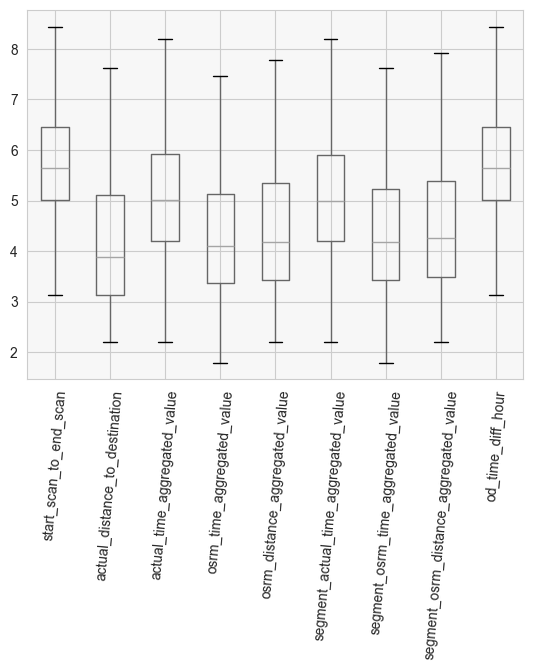

In [ ]:
# checking outliers: using boxplot

trip_delhivery_df_transformed[numeric_cols].boxplot()
plt.xticks(rotation=85)
plt.show()

In [ ]:
# calling function -- for outlier percentages
outlier_percentages = get_outlier_percentages( trip_delhivery_df_transformed[numeric_cols] )

# Print results
print("Outlier Percentages for Numeric Columns:")
print("="*40)
for col, percentage in outlier_percentages.items():
  print(f"{col}: {percentage:.2f}%")

Outlier Percentages for Numeric Columns:
start_scan_to_end_scan: 0.00%
actual_distance_to_destination: 0.00%
actual_time_aggregated_value: 0.00%
osrm_time_aggregated_value: 0.00%
osrm_distance_aggregated_value: 0.00%
segment_actual_time_aggregated_value: 0.00%
segment_osrm_time_aggregated_value: 0.00%
segment_osrm_distance_aggregated_value: 0.00%
od_time_diff_hour: 0.00%


**conclusion for scaling --> As all numeric cols are not NORMAL Distribution and are not having Outliers, we will use ROBUSTScaler for Scaling these Numerical Columns.**

In [ ]:
# Performing RobustScaling

feature_to_scale = numeric_cols

scaler = RobustScaler()

scaler.fit(trip_delhivery_df_transformed[feature_to_scale])

scaled_feature = scaler.transform(trip_delhivery_df_transformed[feature_to_scale])


scaled_feature_names = [col + '_scaled' for col in numeric_cols]

scaled_feature_df = pd.DataFrame(scaled_feature, columns=scaled_feature_names)


trip_delhivery_df_transformed = pd.concat([trip_delhivery_df_transformed.drop(columns=feature_to_scale)
                                           ,scaled_feature_df ], axis=1)

# Print the modified DataFrame
trip_delhivery_df_transformed.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day,data_test,data_training,route_type_Carting,route_type_FTL,source_state_Andhra Pradesh,source_state_Arunachal Pradesh,source_state_Assam,source_state_Bihar,source_state_Chandigarh,source_state_Chhattisgarh,source_state_Dadra and Nagar Haveli,source_state_Delhi,source_state_Goa,source_state_Gujarat,source_state_Haryana,source_state_Himachal Pradesh,source_state_Jammu & Kashmir,source_state_Jharkhand,source_state_Karnataka,source_state_Kerala,source_state_Madhya Pradesh,source_state_Maharashtra,source_state_Mizoram,source_state_Nagaland,source_state_Orissa,source_state_Pondicherry,source_state_Punjab,source_state_Rajasthan,source_state_Tamil Nadu,source_state_Telangana,source_state_Unknown_Source_Nam,source_state_Uttar Pradesh,source_state_Uttarakhand,source_state_West Bengal,destination_state_Andhra Pradesh,destination_state_Arunachal Pradesh,destination_state_Assam,destination_state_Bihar,destination_state_Chandigarh,destination_state_Chhattisgarh,destination_state_Dadra and Nagar Haveli,destination_state_Daman & Diu,destination_state_Delhi,destination_state_Goa,destination_state_Gujarat,destination_state_Haryana,destination_state_Himachal Pradesh,destination_state_Jammu & Kashmir,destination_state_Jharkhand,destination_state_Karnataka,destination_state_Kerala,destination_state_Madhya Pradesh,destination_state_Maharashtra,destination_state_Meghalaya,destination_state_Mizoram,destination_state_Nagaland,destination_state_Orissa,destination_state_Pondicherry,destination_state_Punjab,destination_state_Rajasthan,destination_state_Tamil Nadu,destination_state_Telangana,destination_state_Tripura,destination_state_Unknown_Destination_Nam,destination_state_Uttar Pradesh,destination_state_Uttarakhand,destination_state_West Bengal,trip_creation_month_encoded,trip_creation_day_encoded,start_scan_to_end_scan_scaled,actual_distance_to_destination_scaled,actual_time_aggregated_value_scaled,osrm_time_aggregated_value_scaled,osrm_distance_aggregated_value_scaled,segment_actual_time_aggregated_value_scaled,segment_osrm_time_aggregated_value_scaled,segment_osrm_distance_aggregated_value_scaled,od_time_diff_hour_scaled
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.437124,1.434194,1.375095,1.427634,1.418243,1.372196,1.534586,1.542966,1.440356
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,-0.304120,0.208260,-0.024053,0.071010,0.133955,-0.024289,0.000000,0.095860,-0.300026


In [ ]:
trip_delhivery_df_transformed.shape

(14817, 94)

# Business Insights & Recommendations:

In [ ]:
trip_level_delhivery_df.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259,824.733,1562,743,991.353,1548,1008.0,1320.472,2261,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Sep,2018,12
1,trip-153671042288605164,training,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180,73.187,143,68,85.111,141,65.0,84.188,182,Tumkur,Karnataka,Chikblapur,Karnataka,Sep,2018,12


## From Where the Most Orders are coming from:

In [ ]:
most_order_source_df = trip_level_delhivery_df.groupby("source_state",as_index=False).agg(
    trips_count=("trip_uuid","nunique")).sort_values("trips_count",ascending=False).reset_index(drop=True)

most_order_source_df.head(7)

,source_state,trips_count
0,Maharashtra,2682
1,Karnataka,2229
2,Haryana,1684
3,Tamil Nadu,1085
4,Delhi,793
5,Telangana,780
6,Gujarat,746


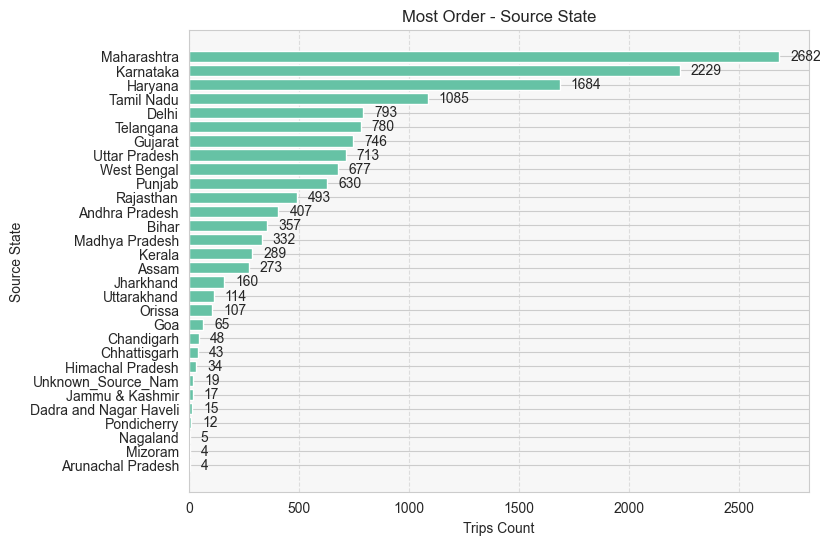

In [ ]:
# Create the plot
plt.figure(figsize=(8, 6))

# Horizontal bars with color
plt.barh(most_order_source_df["source_state"], most_order_source_df["trips_count"])
plt.gca().invert_yaxis()

# Display count on top of bars
for i, (v, text) in enumerate(zip(most_order_source_df["trips_count"], most_order_source_df["source_state"])):
    plt.text(v + 50, i, f"{v}", va='center')  # Adjust offset as needed

# Add labels and title
plt.xlabel('Trips Count')
plt.ylabel('Source State')
plt.title('Most Order - Source State')


# Display grid lines (optional)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

## To Which State Most orders are going:

In [ ]:
most_order_destination_df = trip_level_delhivery_df.groupby("destination_state",as_index=False).agg(
    trips_count=("trip_uuid","nunique")).sort_values("trips_count",ascending=False).reset_index(drop=True)

most_order_destination_df.head(7)

,destination_state,trips_count
0,Maharashtra,2591
1,Karnataka,2275
2,Haryana,1667
3,Tamil Nadu,1072
4,Telangana,838
5,Gujarat,746
6,Uttar Pradesh,728


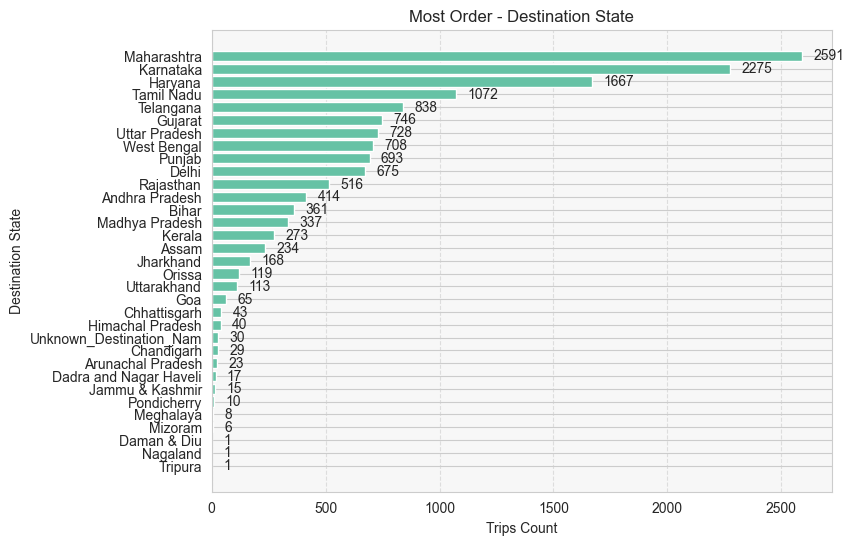

In [ ]:
# Create the plot
plt.figure(figsize=(8, 6))

# Horizontal bars with color
bars = plt.barh(most_order_destination_df["destination_state"], most_order_destination_df["trips_count"])

plt.gca().invert_yaxis()


# Display count on top of bars
for i, (v, text) in enumerate(zip(most_order_destination_df["trips_count"], most_order_destination_df["destination_state"])):
    plt.text(v + 50, i, f"{v}", va='center')  # Adjust offset as needed


# Add labels and title
plt.xlabel('Trips Count')
plt.ylabel('Destination State')
plt.title('Most Order - Destination State')

# Display grid lines (optional)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

## Most Busiest Corridor: avg distance between them, avg time taken, etc.

In [ ]:
trip_level_delhivery_df["corridor_center"] = trip_level_delhivery_df["source_center"] + "#" + trip_level_delhivery_df["destination_center"]

trip_level_delhivery_df["corridor_center"].head(3)

0    IND462022AAA#IND000000ACB
1    IND572101AAA#IND562101AAA
2    IND562132AAA#IND160002AAC
Name: corridor_center, dtype: object

In [ ]:
# creating corridor related df

corridor_df = trip_level_delhivery_df.groupby("corridor_center",as_index=False).agg(
    trips_count=("trip_uuid","count"),
    avg_actual_distance = ("actual_distance_to_destination","mean"),
    avg_actual_time = ("actual_time","mean"),
)

corridor_df["avg_actual_distance"]=round(corridor_df["avg_actual_distance"],3)
corridor_df["avg_actual_time"]=round(corridor_df["avg_actual_time"],2)

corridor_df

,corridor_center,trips_count,avg_actual_distance,avg_actual_time
0,IND000000AAL#IND411033AAA,18,16.186,87.83
1,IND000000AAQ#IND700028AAB,2,11.319,85.00
2,IND000000ABG#IND501359AAF,11,26.966,203.18
3,IND000000ACA#IND000000ACA,20,86.021,197.80
4,IND000000ACA#IND140401AAA,1,67.489,95.00
...,...,...,...,...
2044,IND854326AAB#IND851204AAA,11,131.229,290.82
2045,IND854326AAB#IND852118A1B,1,68.815,127.00
2046,IND854326AAB#IND853204AAA,1,77.833,226.00
2047,IND854326AAB#IND854105AAB,1,25.992,156.00


### Busiest Corridor By Trips:

In [ ]:
top10_trip_based_busiest_corridor =corridor_df[["corridor_center","trips_count"]].sort_values(by="trips_count",ascending=False).head(10).reset_index(
    drop=True)

top10_trip_based_busiest_corridor

,corridor_center,trips_count
0,IND160002AAC#IND160002AAC,175
1,IND562132AAA#IND560300AAA,151
2,IND842001AAA#IND842001AAA,130
3,IND560099AAB#IND560300AAA,121
4,IND421302AAG#IND421302AAG,113
5,IND560300AAA#IND562132AAA,108
6,IND382430AAB#IND382430AAB,107
7,IND421302AAG#IND400072AAB,105
8,IND400072AAD#IND421302AAG,99
9,IND562132AAA#IND560099AAB,97


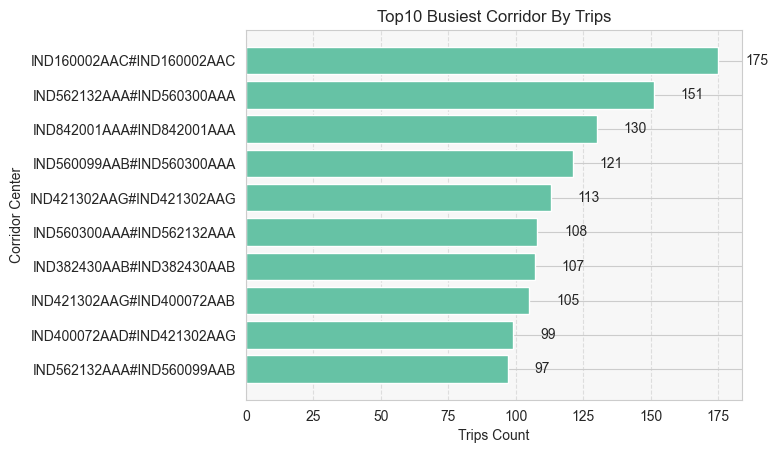

In [ ]:
# Horizontal bars with color
bars = plt.barh(top10_trip_based_busiest_corridor["corridor_center"], top10_trip_based_busiest_corridor["trips_count"])

plt.gca().invert_yaxis()


# Display count on top of bars
for i, (v, text) in enumerate(zip(top10_trip_based_busiest_corridor["trips_count"], top10_trip_based_busiest_corridor["corridor_center"])):
    plt.text(v + 10, i, f"{v}", va='center')  # Adjust offset as needed


# Add labels and title
plt.xlabel('Trips Count')
plt.ylabel('Corridor Center')
plt.title('Top10 Busiest Corridor By Trips')

# Display grid lines (optional)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()



### Busiest corridor by Actual time:

In [ ]:
top10_actualtime_based_busiest_corridor =corridor_df[["corridor_center","avg_actual_time"]].sort_values(by="avg_actual_time",ascending=False).head(10).reset_index(
    drop=True)

top10_actualtime_based_busiest_corridor

,corridor_center,avg_actual_time
0,IND781018AAB#IND421302AAG,5457.00
1,IND421302AAG#IND781018AAB,5067.00
2,IND600056AAB#IND000000ACB,3606.00
3,IND562132AAA#IND160002AAC,3372.47
4,IND781018AAB#IND110037AAM,3370.29
5,IND160002AAC#IND562132AAA,3331.75
6,IND110037AAM#IND781018AAB,3306.00
7,IND000000ACB#IND600056AAB,3117.64
8,IND562132AAA#IND110037AAM,3039.57
9,IND712311AAA#IND562132AAA,2999.31


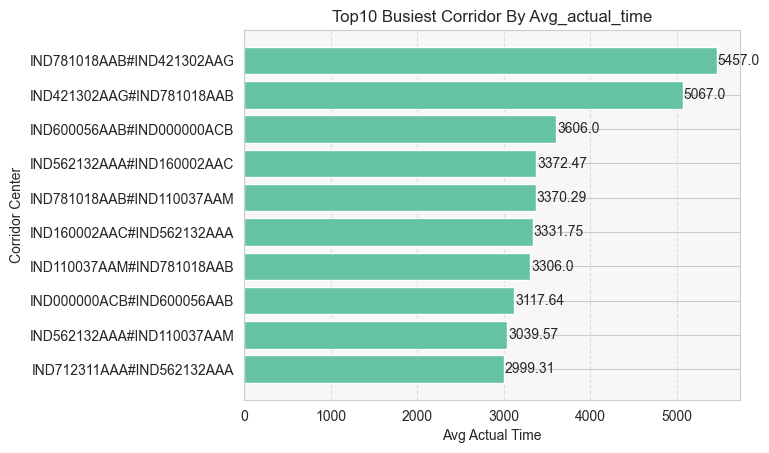

In [ ]:
# Horizontal bars with color
bars = plt.barh(top10_actualtime_based_busiest_corridor["corridor_center"], top10_actualtime_based_busiest_corridor["avg_actual_time"])

plt.gca().invert_yaxis()


# Display count on top of bars
for i, (v, text) in enumerate(zip(top10_actualtime_based_busiest_corridor["avg_actual_time"], top10_actualtime_based_busiest_corridor["corridor_center"])):
    plt.text(v + 10, i, f"{v}", va='center')  # Adjust offset as needed


# Add labels and title
plt.xlabel('Avg Actual Time')
plt.ylabel('Corridor Center')
plt.title('Top10 Busiest Corridor By Avg_actual_time')

# Display grid lines (optional)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()



### Busiest corridor by Actual Distance:

In [ ]:
top10_actualdistance_based_busiest_corridor =corridor_df[["corridor_center","avg_actual_distance"]].sort_values(
    by="avg_actual_distance",ascending=False).head(10).reset_index(drop=True)

top10_actualdistance_based_busiest_corridor

,corridor_center,avg_actual_distance
0,IND781018AAB#IND421302AAG,2157.968
1,IND421302AAG#IND781018AAB,2061.157
2,IND562132AAA#IND160002AAC,1936.674
3,IND160002AAC#IND562132AAA,1927.400
4,IND562132AAA#IND110037AAM,1765.286
5,IND600056AAB#IND000000ACB,1730.821
6,IND000000ACB#IND600056AAB,1721.281
7,IND562132AAC#IND000000ACB,1694.385
8,IND562132AAA#IND000000ACB,1691.929
9,IND000000ACB#IND562132AAA,1689.691


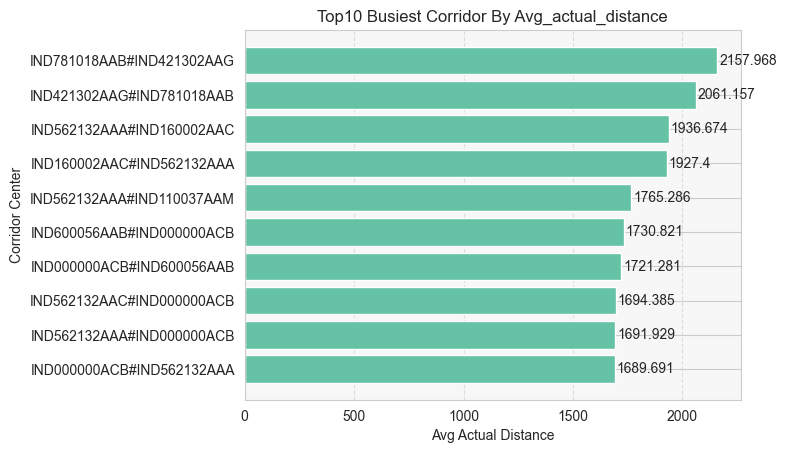

In [ ]:
# Horizontal bars with color
bars = plt.barh(top10_actualdistance_based_busiest_corridor["corridor_center"], top10_actualdistance_based_busiest_corridor["avg_actual_distance"])

plt.gca().invert_yaxis()


# Display count on top of bars
for i, (v, text) in enumerate(zip(top10_actualdistance_based_busiest_corridor["avg_actual_distance"], top10_actualdistance_based_busiest_corridor["corridor_center"])):
    plt.text(v + 10, i, f"{v}", va='center')  # Adjust offset as needed


# Add labels and title
plt.xlabel('Avg Actual Distance')
plt.ylabel('Corridor Center')
plt.title('Top10 Busiest Corridor By Avg_actual_distance')

# Display grid lines (optional)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()



**Insight3:**

* Maharashtra, Karnataka, Tamil Nadu, Utter Pradesh, Telangana and Gujarat States are states where most delivery trips are done. Most Bussiest corridor are in these states.

## Business Recommendations:
* Business should focus on identifying best corridors to move packages very quickly, they should focus on potential reasons for difference in actual delivery time and osrm delivery time value.
* If Actual delivery time is higher than osrm time then should focus on hops which are causing delays, if delays are related to processing or logistic that should be quickly fixed.
* If Issue is not related to delivery and logistic process then should focus on identifying best route to move packages quickly.

In [ ]:
print("project ended")

project ended
